In [ ]:
#!pip install aquacrop==2.2
#!pip install numba==0.55
#!pip install statsmodels==0.13.2
#!pip install SALib
#!pip install -U scikit-learn scipy matplotlib
!pip install --upgrade pyswarm  #https://pythonhosted.org/pyswarm/

In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from aquacrop.utils import prepare_weather, get_filepath
from aquacrop import AquaCropModel, Soil, Crop, InitialWaterContent, IrrigationManagement
#from aquacrop.entities import IrrigationManagement

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import time
import pickle 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from pyswarm import pso
import os
from os import chdir, getcwd
import statistics as stats


In [2]:
os.chdir('/home/jupyter-wndlovu/') # change working directory

wd=getcwd()

In [3]:
def soilCompart(soilList):
    """
    This function is used the calculate the custom soil layers for each county for any given crop-irrigation 
    management combination.
    It returns a nested list with where each list has the custom soil layer for each year.
       
    """
    
    custom_soil = []

    for df in soilList:
        
        #soils_df = df.groupby(['Year'])
        soils_df = [v for k, v in df.groupby('Year')]
        soils = []
        #print(soils_df)
        for j in soils_df:
            
            soils_df_pivot = j.drop(['crop_mn_codeyear', 'Year'], axis=1)
            #print(soils_df_pivot)
            for i, row in soils_df_pivot.iterrows():
                
                #print(soils_df_pivot)
                if row['depth'] == "0_5":
                    pred_thWP_5 = ((-0.024*((soils_df_pivot['sand'][i])/100))) + ((0.487*((soils_df_pivot['clay'][i])/100))) + ((0.006*((soils_df_pivot['om'][i])/100))) + ((0.005*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['om'][i])/100))- ((0.013*((soils_df_pivot['clay'][i])/100))*((soils_df_pivot['om'][i])/100))+ ((0.068*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['clay'][i])/100))+ 0.031
                    wp_5 = pred_thWP_5 + (0.14 * pred_thWP_5) - 0.02
                    pred_thFC_5 = ((-0.251*((soils_df_pivot['sand'][i])/100))) + ((0.195*((soils_df_pivot['clay'][i])/100)))+ ((0.011*((soils_df_pivot['om'][i])/100))) + ((0.006*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['om'][i])/100))- ((0.027*((soils_df_pivot['clay'][i])/100))*((soils_df_pivot['om'][i])/100))+ ((0.452*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['clay'][i])/100))+ 0.299
                    fc_5 = pred_thFC_5 + (1.283 * (np.power(pred_thFC_5, 2))) - (0.374 * pred_thFC_5) - 0.015
                        #fc = pred_thFC + (1.283 * (pred_thFC*pred_thFC)) - (0.374 * pred_thFC) - 0.015
                    ts_5 =soils_df_pivot["theta_s"][i]
                    ks_5=(soils_df_pivot['ksat'][i])*240
                if row['depth'] == "100_200":
                    pred_thWP_200 = ((-0.024*((soils_df_pivot['sand'][i])/100))) + ((0.487*((soils_df_pivot['clay'][i])/100))) + ((0.006*((soils_df_pivot['om'][i])/100))) + ((0.005*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['om'][i])/100))- ((0.013*((soils_df_pivot['clay'][i])/100))*((soils_df_pivot['om'][i])/100))+ ((0.068*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['clay'][i])/100))+ 0.031
                    wp_200 = pred_thWP_200 + (0.14 * pred_thWP_200) - 0.02
                    pred_thFC_200 = ((-0.251*((soils_df_pivot['sand'][i])/100))) + ((0.195*((soils_df_pivot['clay'][i])/100)))+ ((0.011*((soils_df_pivot['om'][i])/100))) + ((0.006*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['om'][i])/100))- ((0.027*((soils_df_pivot['clay'][i])/100))*((soils_df_pivot['om'][i])/100))+ ((0.452*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['clay'][i])/100))+ 0.299
                    fc_200 = pred_thFC_200 + (1.283 * (np.power(pred_thFC_200, 2))) - (0.374 * pred_thFC_200) - 0.015
                    #fc = pred_thFC + (1.283 * (pred_thFC*pred_thFC)) - (0.374 * pred_thFC) - 0.015
                    ts_200 =soils_df_pivot["theta_s"][i]
                    ks_200=(soils_df_pivot['ksat'][i])*240
                if row['depth'] == "15_30":
                    pred_thWP_30 = ((-0.024*((soils_df_pivot['sand'][i])/100))) + ((0.487*((soils_df_pivot['clay'][i])/100))) + ((0.006*((soils_df_pivot['om'][i])/100))) + ((0.005*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['om'][i])/100))- ((0.013*((soils_df_pivot['clay'][i])/100))*((soils_df_pivot['om'][i])/100))+ ((0.068*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['clay'][i])/100))+ 0.031
                    wp_30 = pred_thWP_30 + (0.14 * pred_thWP_30) - 0.02
                    pred_thFC_30 = ((-0.251*((soils_df_pivot['sand'][i])/100))) + ((0.195*((soils_df_pivot['clay'][i])/100)))+ ((0.011*((soils_df_pivot['om'][i])/100))) + ((0.006*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['om'][i])/100))- ((0.027*((soils_df_pivot['clay'][i])/100))*((soils_df_pivot['om'][i])/100))+ ((0.452*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['clay'][i])/100))+ 0.299
                    fc_30 = pred_thFC_30 + (1.283 * (np.power(pred_thFC_30, 2))) - (0.374 * pred_thFC_30) - 0.015
                    #fc = pred_thFC + (1.283 * (pred_thFC*pred_thFC)) - (0.374 * pred_thFC) - 0.015
                    ts_30 =soils_df_pivot["theta_s"][i]
                    ks_30=(soils_df_pivot['ksat'][i])*240
                if row['depth'] == "30_60":
                    pred_thWP_60 = ((-0.024*((soils_df_pivot['sand'][i])/100))) + ((0.487*((soils_df_pivot['clay'][i])/100))) + ((0.006*((soils_df_pivot['om'][i])/100))) + ((0.005*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['om'][i])/100))- ((0.013*((soils_df_pivot['clay'][i])/100))*((soils_df_pivot['om'][i])/100))+ ((0.068*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['clay'][i])/100))+ 0.031
                    wp_60 = pred_thWP_60 + (0.14 * pred_thWP_60) - 0.02
                    pred_thFC_60 = ((-0.251*((soils_df_pivot['sand'][i])/100))) + ((0.195*((soils_df_pivot['clay'][i])/100)))+ ((0.011*((soils_df_pivot['om'][i])/100))) + ((0.006*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['om'][i])/100))- ((0.027*((soils_df_pivot['clay'][i])/100))*((soils_df_pivot['om'][i])/100))+ ((0.452*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['clay'][i])/100))+ 0.299
                    fc_60 = pred_thFC_60 + (1.283 * (np.power(pred_thFC_60, 2))) - (0.374 * pred_thFC_60) - 0.015
                    #fc = pred_thFC + (1.283 * (pred_thFC*pred_thFC)) - (0.374 * pred_thFC) - 0.015
                    ts_60 =soils_df_pivot["theta_s"][i]
                    ks_60=(soils_df_pivot['ksat'][i])*240
                if row['depth'] == "5_15":
                    pred_thWP_15 = ((-0.024*((soils_df_pivot['sand'][i])/100))) + ((0.487*((soils_df_pivot['clay'][i])/100))) + ((0.006*((soils_df_pivot['om'][i])/100))) + ((0.005*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['om'][i])/100))- ((0.013*((soils_df_pivot['clay'][i])/100))*((soils_df_pivot['om'][i])/100))+ ((0.068*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['clay'][i])/100))+ 0.031
                    wp_15 = pred_thWP_15 + (0.14 * pred_thWP_15) - 0.02
                    pred_thFC_15 = ((-0.251*((soils_df_pivot['sand'][i])/100))) + ((0.195*((soils_df_pivot['clay'][i])/100)))+ ((0.011*((soils_df_pivot['om'][i])/100))) + ((0.006*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['om'][i])/100))- ((0.027*((soils_df_pivot['clay'][i])/100))*((soils_df_pivot['om'][i])/100))+ ((0.452*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['clay'][i])/100))+ 0.299
                    fc_15 = pred_thFC_15 + (1.283 * (np.power(pred_thFC_15, 2))) - (0.374 * pred_thFC_15) - 0.015
                    #fc = pred_thFC + (1.283 * (pred_thFC*pred_thFC)) - (0.374 * pred_thFC) - 0.015
                    ts_15 =soils_df_pivot["theta_s"][i]
                    #print(ts_15)
                    ks_15=(soils_df_pivot['ksat'][i])*240
                if row['depth'] == "60_100":
                    pred_thWP_100 = ((-0.024*((soils_df_pivot['sand'][i])/100))) + ((0.487*((soils_df_pivot['clay'][i])/100))) + ((0.006*((soils_df_pivot['om'][i])/100))) + ((0.005*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['om'][i])/100))- ((0.013*((soils_df_pivot['clay'][i])/100))*((soils_df_pivot['om'][i])/100))+ ((0.068*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['clay'][i])/100))+ 0.031
                    wp_100 = pred_thWP_100 + (0.14 * pred_thWP_100) - 0.02
                    pred_thFC_100 = ((-0.251*((soils_df_pivot['sand'][i])/100))) + ((0.195*((soils_df_pivot['clay'][i])/100)))+ ((0.011*((soils_df_pivot['om'][i])/100))) + ((0.006*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['om'][i])/100))- ((0.027*((soils_df_pivot['clay'][i])/100))*((soils_df_pivot['om'][i])/100))+ ((0.452*((soils_df_pivot['sand'][i])/100))*((soils_df_pivot['clay'][i])/100))+ 0.299
                    fc_100 = pred_thFC_100 + (1.283 * (np.power(pred_thFC_100, 2))) - (0.374 * pred_thFC_100) - 0.015
                    #fc = pred_thFC + (1.283 * (pred_thFC*pred_thFC)) - (0.374 * pred_thFC) - 0.015
                    ts_100 =soils_df_pivot["theta_s"][i]
                    ks_100=(soils_df_pivot['ksat'][i])*240

                    

                    custom = Soil('custom',cn=46,rew=7, dz=[0.025]*2+[0.05]*2+[0.075]*2+[0.15]*2+[0.2]*2+[0.5]*2)

                    custom.add_layer(thickness=0.05,thS=ts_5, # assuming soil properties are the same in the upper 0.1m
                         Ksat=ks_5,thWP =wp_5 , 
                         thFC = fc_5, penetrability = 100.0)
                    custom.add_layer(thickness=0.15,thS=ts_15, # assuming soil properties are the same in the upper 0.1m
                                 Ksat=ks_15,thWP =wp_15 , 
                                 thFC = fc_15, penetrability = 100.0)
                    custom.add_layer(thickness=0.3,thS=ts_30, # assuming soil properties are the same in the upper 0.1m
                                 Ksat=ks_30,thWP =wp_30 , 
                                 thFC = fc_30, penetrability = 100.0)
                    custom.add_layer(thickness=0.3,thS=ts_60, # assuming soil properties are the same in the upper 0.1m
                                 Ksat=ks_60,thWP =wp_60 , 
                                 thFC = fc_60, penetrability = 100.0)
                    custom.add_layer(thickness=0.4,thS=ts_100, # assuming soil properties are the same in the upper 0.1m
                                 Ksat=ks_100,thWP =wp_100 , 
                                 thFC = fc_100, penetrability = 100.0)
                    custom.add_layer(thickness=1,thS=ts_200, # assuming soil properties are the same in the upper 0.1m
                                 Ksat=ks_200,thWP =wp_200 , 
                                 thFC = fc_200, penetrability = 100.0)
                    
                    soils.append(custom)
                    
        custom_soil.append(soils)

                    #print(custom)

    return(custom_soil)

In [4]:
with open(wd + '/eggs/data/input_dict.pickle', 'rb') as input_data: 
    input_dict = pickle.load(input_data) 
    
corn_yield = pd.read_csv(wd + '/eggs/data/CornYield_GMD4_WNdlovu_v1_20230117.csv')
soybean_yield = pd.read_csv(wd + '/eggs/data/SoybeansYield_GMD4_WNdlovu_v1_20230117.csv')
sorghum_yield = pd.read_csv(wd + '/eggs/data/SorghumYield_GMD4_WNdlovu_v1_20230117.csv')
wheat_yield = pd.read_csv(wd + '/eggs/data/WheatYield_GMD4_WNdlovu_v1_20230117.csv')

# rma yield
rma_yield_df = pd.read_csv(wd + '/eggs/data/rma_data2.csv')

irrig_depth = pd.read_csv(wd + '/eggs/data/IrrigationDepth_GMD4_WNdlovu_v1_20230123.csv')

irrig_corn_calib = np.array(pd.read_csv(wd + '/eggs/data/irrigated_corn_calibration_params.csv'))

rainfed_corn_calib = np.array(pd.read_csv(wd + '/eggs/data/rainfed_corn_calibration_params.csv'))   

# Irrigated corn

In [5]:
irrig_corn = '1' # code for irrigated corn
irrig_corn_dict = {k:v for (k,v) in input_dict.items() if irrig_corn in k}

In [6]:
# calibrate using the decatur, gove, graham, logan, rawlins
#calibration = list(irrig_corn_dict.items())[:5]
calibration = list(irrig_corn_dict.items())
#calibration

In [7]:
# getting the different datasets
gridmet = [sublist[1][0] for sublist in calibration] # data stored in nested list with 0 having the 
lai = [sublist[1][1] for sublist in calibration]
soil = [sublist[1][2] for sublist in calibration]

### Soil data is currently being saved in one list - wondering if saving it in 5 lists make more sense (one list for each county)

In [8]:
soil_irrig = soilCompart(soil)

## Get usda yield for the calibration counties

In [9]:
#corn_yield = pd.read_csv(wd + '/eggs/data/CornYield_GMD4_WNdlovu_v1_20230117.csv')
corn_yield = corn_yield[corn_yield['Commodity'] == 'CORN']
irrig_usda = corn_yield[corn_yield['Irrig_status'] == 'irrigated']
rainfed_usda = corn_yield[corn_yield['Irrig_status'] == 'rainfed']

In [10]:
# merge the usda df 
usda_yieldList = [corn_yield, soybean_yield, wheat_yield, sorghum_yield]

usda_yield = pd.concat(usda_yieldList)

# rename crops to match aquacrop name
usda_yield['Commodity'] = usda_yield['Commodity'].str.replace('CORN', 'Maize')
#usda_yield['Commodity'] = usda_yield['Commodity'].str.replace('SORGHUM', 'Sorghum')
usda_yield['Commodity'] = usda_yield['Commodity'].str.replace('SOYBEANS', 'Soybean')
#usda_yield['Commodity'] = usda_yield['Commodity'].str.replace('WHEAT', 'Wheat')

usda_yield['Commodity'] = usda_yield['Commodity'].str.capitalize()

usda_yield['County'] = usda_yield['County'].str.capitalize()

usda_yield = usda_yield.rename(columns = {'Commodity': 'crop Type'})

irrig_usda = usda_yield[usda_yield['Irrig_status'] == 'irrigated']
rainfed_usda = usda_yield[usda_yield['Irrig_status'] == 'rainfed']

## Get rma yield for calibration

In [11]:
#rma_yield_df = pd.read_csv(wd + '/eggs/data/rma_data2.csv')
# make first row column headers


rma_yield = rma_yield_df.copy()

rma_yield.columns = rma_yield.iloc[0]
rma_yield = rma_yield[1:]

# filter for years
rma_yield['Year'] = rma_yield['Year'].astype(int)

rma_yield['Yield Amount'] = rma_yield['Yield Amount'].astype(float)

rma_yield = rma_yield[['Year', 'Commodity Name', 'State Name', 'County Name', 
                             'Reference Irrigation Practice Name', 'Yield Amount']]


rma_yield = rma_yield[(rma_yield['Year'] >= 2000) & (rma_yield['Year'] < 2021)]

# filter for counties

gmd4 = ['Cheyenne', 'Rawlins', 'Decatur', 'Sherman', 'Gove', 'Thomas', 'Sheridan', 'Graham', 'Wallace', 'Logan'] # list of gmd4 coundties
rma_yield = rma_yield[rma_yield['County Name'].isin(gmd4)] # filter for counties inside gmd4 list


#
rma_yield = rma_yield.rename(columns = {'Commodity Name': 'crop Type',
                                              'County Name': 'County',
                                              'Reference Irrigation Practice Name':'Irrig_status',
                                              'Yield Amount': 'Value'})
                                              

rma_yield['crop Type'] = rma_yield['crop Type'].str.replace('Corn', 'Maize')
rma_yield['crop Type'] = rma_yield['crop Type'].str.replace('Soybeans', 'Soybean')    


irrig_rma_yield = rma_yield[rma_yield['Irrig_status'] == 'Irrigated']
rainfed_rma_yield = rma_yield[rma_yield['Irrig_status'] == 'Non-Irrigated']
                                             

## WIMAS irrigation depth

In [12]:
irrig_depth = irrig_depth[irrig_depth['gmd'] == 4]

In [13]:
# create full county name variable
irrig_depth['County'] = np.where(
         irrig_depth['county_abrev'] == 'WA', 'Wallace',
         np.where(
              irrig_depth['county_abrev'] == 'RA', 'Rawlins',
              np.where(
                   irrig_depth['county_abrev'] == 'DC', 'Decatur',
                   np.where(
                        irrig_depth['county_abrev'] == 'GH', 'Graham',
                        np.where(
                             irrig_depth['county_abrev'] == 'CN', 'Cheyenne',
                             np.where(
                                 irrig_depth['county_abrev'] == 'LG', 'Logan',
                             np.where(
                                         irrig_depth['county_abrev'] == 'SD', 'Sheridan',
                                     np.where(
                                          irrig_depth['county_abrev'] == 'TH', 'Thomas',
                                          np.where(
                                               irrig_depth['county_abrev'] == 'SH', 'Sherman', 'Gove'
                                          )  
                                       )

                                  )
                             )
                        )
                   )
              )
         )
    )


irrig_depth['crop_name'] = irrig_depth['crop_name'].str.replace('Corn', 'Maize')
irrig_depth['crop_name'] = irrig_depth['crop_name'].str.replace('Soybeans', 'Soybean')
irrig_depth['crop_name'] = irrig_depth['crop_name'].str.replace('Winter Wheat', 'Wheat')

# rename year column
irrig_depth = irrig_depth.rename(columns = {'WUA_YEAR': 'Year',
                                            'crop_name': 'crop Type'})

In [14]:
# calculate mean irrig
irrig_depth = irrig_depth.groupby(['County', 'Year', 'crop Type']).agg({'irrig_depth':'median'})
irrig_depth = irrig_depth.reset_index()                                                             
irrig_depth

,County,Year,crop Type,irrig_depth
0,Cheyenne,1990,Maize,499.273107
1,Cheyenne,1990,Sorghum,286.560964
2,Cheyenne,1990,Soybean,294.088771
3,Cheyenne,1990,Wheat,154.201294
4,Cheyenne,1991,Maize,457.287460
...,...,...,...,...
1089,Wallace,2017,Wheat,52.251429
1090,Wallace,2018,Maize,221.792800
1091,Wallace,2019,Maize,237.102161
1092,Wallace,2020,Maize,340.766400


## LAI

In [22]:
lai_df_full = pd.concat(lai)
lai_df_full = lai_df_full.rename(columns = {'date': 'Date'})

In [23]:
dec = lai_df_full[(lai_df_full['County'] == 'Decatur') &  (lai_df_full['Year'] == 2018)] 
dec.head()

,crop_mn_codeyear,Year,Date,Lai_500m,cc,index,County
41,1_Decatur,2018,2018-01-01,2.680430,0.101964,551,Decatur
109,1_Decatur,2018,2018-01-09,2.587512,0.098056,552,Decatur
177,1_Decatur,2018,2018-01-17,2.050173,0.075574,553,Decatur
245,1_Decatur,2018,2018-01-25,1.624878,0.058041,554,Decatur
313,1_Decatur,2018,2018-02-02,1.986896,0.072946,555,Decatur


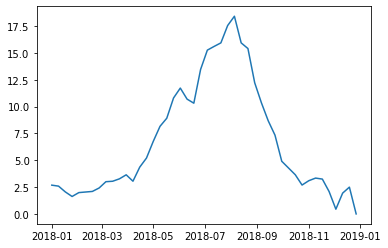

In [24]:
import matplotlib.pyplot as plt
plt.plot(dec['Date'],  dec['Lai_500m'])

## testing gdd calc

In [59]:
## calculate gdd test 
lai_df_full2 = lai_df_full.merge(gridmet[0], how = 'inner', on = ['crop_mn_codeyear', 'Date'])
lai_df_full2 = lai_df_full2.assign(gdd = (lai_df_full2['MinTemp'] + lai_df_full2['MaxTemp'])/2 - 8)
lai_df_full2.head()

,crop_mn_codeyear,Year_x,Date,Lai_500m,cc,index,County,MinTemp,MaxTemp,Precipitation,ReferenceET,Year_y,gdd
0,1_Decatur,2006,2006-01-01,3.817813,0.149821,0,Decatur,-3.386346,10.803892,0.74,1.26,2006,-4.291227
1,1_Decatur,2006,2006-01-09,3.746380,0.146827,1,Decatur,-7.604543,5.834876,0.00,0.77,2006,-8.884834
2,1_Decatur,2006,2006-01-17,3.832163,0.150423,2,Decatur,-9.165817,7.979238,0.00,1.83,2006,-8.593289
3,1_Decatur,2006,2006-01-25,3.897087,0.153142,3,Decatur,-5.089976,15.047282,0.00,2.62,2006,-3.021347
4,1_Decatur,2006,2006-02-02,4.146736,0.163571,4,Decatur,-1.748289,12.897021,0.00,2.83,2006,-2.425634


## Define Default Parameters - Crop, Planting Date and Phenological Stages

In [15]:
stages = ['Maize', '05/01', 15, 42, 131, 91, 83, 67, 60, 13.7, 1.31]
pheno_df = pd.DataFrame(stages)
pheno_df = pheno_df.transpose()
pheno_df.columns = ['crop', 'planting_date', 'Emergence', 'Senescence', 'Maturity', 'MaxRooting', 'HIstart', 'Flowering', 'YldForm', 'CGC', 'CDC']


In [16]:
def inputData(defaults_df, weather, soil): # maybe add the irrigation method here
    """
    Function used to add df with crop name, crop planting date and default pheno parameter values.
    """
    
    return defaults_df, weather, soil

## Test loop through the input dataframes: failing to use the soil list

In [26]:
def modelRun(x):
    """ 
    
    """
    
    irrig_corn_calib = x # parameters to be calibrated
    
    default_params = inputData(pheno_df) # default parameters
    
    
    # uncalibrated model
    #irr_mngt_uncalib = IrrigationManagement(irrigation_method=1,SMT=[80]*4) # no irrigation
    
    #crop_uncalibrated =  Crop(c_name = default_params['crop'].item(),
                           #planting_date = default_params['planting_date'].item())
    
    
    # calibrated model
    irr_mngt = IrrigationManagement(irrigation_method=1,SMT=[10, 10, 10, 10]) # 10 is a dummy variable
    
    for i in irrig_corn_calib: # update the SMT
            if hasattr(irr_mngt, str(i)):
               setattr(irr_mngt, str(i), None) 
    
    crop_calibrated = Crop(c_name = default_params['crop'].item(),
                           # growth stages
                           CalendarType = 1,
                           SwitchGDD = 1,  #Convert calendar to gdd mode if inputs are given in calendar days (0 = No; 1 = Yes)
                           planting_date = default_params['planting_date'].item(),
                           Emergence = default_params['Emergence'].item(),
                           Senescence = default_params['Senescence'].item(),
                           Maturity = default_params['Maturity'].item(),
                           MaxRooting = default_params['MaxRooting'].item(),
                           HIstart = default_params['HIstart'].item(),
                           Flowering = default_params['Flowering'].item(),
                           YldForm = default_params['YldForm'].item(),
                
                            # canopy cover profile
                           CGC = default_params['CGC'].item(),
                           CDC = default_params['CDC'].item()
                          )
    
    # look for new way to update parameters
    
    for i in irrig_corn_calib: # update crop param
            if hasattr(crop_calibrated, str(i)):
               setattr(crop_calibrated, str(i), None)  
    
    initWC = InitialWaterContent(value=['FC'])
    
    # run model for each county
    calib_counties = []
    
    model_results_canopy = []
    
    counter_county = -1
    
    for county in gridmet:
        counter_county += 1
        model_results_yield = []
        #model_results_canopy = []
        gridmet_df = [v for k, v in county.groupby('Year')]
        #for soil in soil_irrig:
        counter_year = -1    
            #for custom_soil in soil:
        for met in gridmet_df: # add second counter 
                            counter_year += 1
                            countyname = met['crop_mn_codeyear'].str.replace(r'^.*?(?=[a-z, A-Z])', '', regex=True).unique()[0].capitalize()
                            #print(county)
                            yr = met['Year'].unique()[0]
                            wdf = met[['MinTemp', 
                                                 'MaxTemp',
                                                 'Precipitation', 
                                                 'ReferenceET',
                                                 'Date'
                                                ]]

                            sim_start = f'{yr}/01/01' #dates to match crop data
                            sim_end = f'{yr}/12/31'
                            #print(sim_start)


                            custom_soil = soil_irrig[counter_county][counter_year]


                            # run model
                            model_c = AquaCropModel(sim_start,sim_end,wdf,custom_soil,crop_calibrated,initWC, irr_mngt)
                            model_c.run_model(till_termination=True) # run model till the end
                            model_c_et = model_c._outputs.water_flux
                            model_c_irr = model_c._outputs.final_stats
                            #model_c_water_storage = model_c._outputs.water_storage
                            #model_c_crp_grwth = model_c._outputs.crop_growth

                             # make year a column 
                            model_c_irr = model_c_irr.assign(Year =  model_c_irr['Harvest Date (YYYY/MM/DD)'].dt.year)
                            model_c_irr = model_c_irr.rename(columns={
                                               'Yield (tonne/ha)': 'Calib Yield (t/ha)',
                                               'Seasonal irrigation (mm)': 'Calib Irrigation (mm)'
                                               })

                            #model_c_irr = model_c_irr[['Year', 'Calib Yield (t/ha)', 'Calib Irrigation (mm)']]


                            model_results_yield.append(model_c_irr)
                            #model_results_canopy.append(model_c_crp_grwth)




        model_results_df = pd.concat(model_results_yield)
        model_results_df['County'] = countyname

                # compare models
        model_comp = model_results_df.merge(irrig_usda, how='inner', on=['Year', 'County', 'crop Type']).merge(irrig_depth, how='inner', on = ['Year', 'County', 'crop Type'])
        model_comp = model_comp.assign(YieldUSDA = model_comp['Value']*0.0673)



        calib_counties.append(model_comp)

    
    return(calib_counties)

In [140]:
#test = modelRun([0.650, 1.0, 30.0, 75.0, 0.48, 0.1, 0.2, 45.0])

In [ ]:
#test[1]

## Test fitness

In [57]:
def objFun(x):
    """ 
    
    """
    
    irrig_corn_calib = x # parameters to be calibrated
    
    default_params = inputData(pheno_df) # default parameters
    
    
    # uncalibrated model
    #irr_mngt_uncalib = IrrigationManagement(irrigation_method=1,SMT=[80]*4) # no irrigation
    
    #crop_uncalibrated =  Crop(c_name = default_params['crop'].item(),
                           #planting_date = default_params['planting_date'].item())
    
    
    # calibrated model
    irr_mngt = IrrigationManagement(irrigation_method=1,SMT=[10, 10, 10, 10]) # 10 is a dummy variable
    
    for i in irrig_corn_calib: # update the SMT
            if hasattr(irr_mngt, str(i)):
               setattr(irr_mngt, str(i), None) 
    
    crop_calibrated = Crop(c_name = default_params['crop'].item(),
                           # growth stages
                           CalendarType = 1,
                           SwitchGDD = 1,  #Convert calendar to gdd mode if inputs are given in calendar days (0 = No; 1 = Yes)
                           planting_date = default_params['planting_date'].item(),
                           Emergence = default_params['Emergence'].item(),
                           Senescence = default_params['Senescence'].item(),
                           Maturity = default_params['Maturity'].item(),
                           MaxRooting = default_params['MaxRooting'].item(),
                           HIstart = default_params['HIstart'].item(),
                           Flowering = default_params['Flowering'].item(),
                           YldForm = default_params['YldForm'].item(),
                
                            # canopy cover profile
                           CGC = default_params['CGC'].item(),
                           CDC = default_params['CDC'].item()
                          )
    
    for i in irrig_corn_calib: # update crop param
            if hasattr(crop_calibrated, str(i)):
               setattr(crop_calibrated, str(i), None)  
    
    initWC = InitialWaterContent(value=['FC'])
    
    # run model for each county
    calib_counties = []
    
    model_results_canopy = []
    
    counter_county = -1
    
    for county in gridmet:
        counter_county += 1
        model_results_yield = []
        #model_results_canopy = []
        gridmet_df = [v for k, v in county.groupby('Year')]
        #for soil in soil_irrig:
        counter_year = -1    
            #for custom_soil in soil:
        for met in gridmet_df: # add second counter 
                            counter_year += 1
                            countyname = met['crop_mn_codeyear'].str.replace(r'^.*?(?=[a-z, A-Z])', '', regex=True).unique()[0].capitalize()
                            #print(county)
                            yr = met['Year'].unique()[0]
                            wdf = met[['MinTemp', 
                                                 'MaxTemp',
                                                 'Precipitation', 
                                                 'ReferenceET',
                                                 'Date'
                                                ]]

                            sim_start = f'{yr}/01/01' #dates to match crop data
                            sim_end = f'{yr}/12/31'
                            #print(sim_start)


                            custom_soil = soil_irrig[counter_county][counter_year]


                            # run model
                            model_c = AquaCropModel(sim_start,sim_end,wdf,custom_soil,crop_calibrated,initWC, irr_mngt)
                            model_c.run_model(till_termination=True) # run model till the end
                            model_c_et = model_c._outputs.water_flux
                            model_c_irr = model_c._outputs.final_stats
                            #model_c_water_storage = model_c._outputs.water_storage
                            #model_c_crp_grwth = model_c._outputs.crop_growth

                             # make year a column 
                            model_c_irr = model_c_irr.assign(Year =  model_c_irr['Harvest Date (YYYY/MM/DD)'].dt.year)
                            model_c_irr = model_c_irr.rename(columns={
                                               'Yield (tonne/ha)': 'Calib Yield (t/ha)',
                                               'Seasonal irrigation (mm)': 'Calib Irrigation (mm)'
                                               })

                            #model_c_irr = model_c_irr[['Year', 'Calib Yield (t/ha)', 'Calib Irrigation (mm)']]


                            model_results_yield.append(model_c_irr)
                            #model_results_canopy.append(model_c_crp_grwth)




        model_results_df = pd.concat(model_results_yield)
        model_results_df['County'] = countyname

                # compare models
        model_comp = model_results_df.merge(irrig_usda, how='inner', on=['Year', 'County', 'crop Type']).merge(irrig_depth, how='inner', on = ['Year', 'County', 'crop Type'])
        model_comp = model_comp.assign(YieldUSDA = model_comp['Value']*0.0673)



        calib_counties.append(model_comp)

    

        #calib_counties.append(model_comp)
        y_yield = model_comp[['YieldUSDA']]
        yhat_yield = model_comp[['Calib Yield (t/ha)']]
    
        y_irrig = model_comp[['irrig_depth']]
        yhat_irrig = model_comp[['Calib Irrigation (mm)']]

    
        var_yield = y_yield.var()
        var_irrig = y_irrig.var()
    
    #return var_yield, var_irrig
    #fitness = ((y[['YieldUSDA']]-yhat[['Calib Yield (t/ha)']])**2).sum() # Calculate fitness score based on AquaCrop performance
    #fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*(1/var_yield)).sum() #+ (var_irrig*((np.array(y_irrig)-np.array(yhat_irrig))**2)).sum().item()
        fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*np.array(1/var_yield)).sum().item() +(((np.array(y_irrig)-np.array(yhat_irrig))**2)*np.array(1/var_irrig)).sum().item()
    
        #fitness_list.append(fitness)
    return fitness # fitness 
    
    #return(calib_counties)

In [ ]:
## Objective function now working when you use array as input

In [32]:
def objFun(x, *args):
    """ 
    
    """
    
 # parameters to be calibrated
    param_names = pd.DataFrame(x)
    param_names['rownum'] = param_names.reset_index().index 
    param_names = param_names.rename(columns = {param_names.columns[0]: "value" })
    
    
    defaults_df, weather, soil, sa = args
    
    sa_params = pd.DataFrame(np.array(args).flatten())
    
    #sa_params = pd.DataFrame(sa_params_array) # from array to df
    
    #sa_params = sa_params
    sa_params['rownum'] = sa_params.reset_index().index 
    
    #sa_params_v2 = sa_params.copy() # used to keep the sa params in different font from the one use in AquaCrop 
    #sa_params_v2 = sa_params_v2.rename(columns = {sa_params_v2.columns[0]: "variable1" })  # rename the first column
    
    new_names = {
        'tb': 'Tbase', 
        'tu': 'Tupp',
        'ccs': 'SeedSize',
        'den': 'PlantPop',
        'eme': 'Emergence',
        'cgc':'CGC',
        'ccx': 'CCx',
        'sen': 'Senescence',
        'cdc': 'CDC',
        'mat': 'Maturity',
        'rtm': 'Zmin',
        'flolen': 'Flowering',
        'rtx': 'Zmax',
        'rtshp': 'fshape_r',
        'root': 'MaxRooting',
        'rtexup': 'SxTopQ',
        'rtexlw': 'SxBotQ',
         #Crop Transpiration
        'kc': 'Kcb',
        'kcdcl': 'fage',
         #Biomass and Yield
        'wp': 'WP',
        'wpy': 'WPy',
        'hi': 'HI0',
        'hipsflo': 'dHI_pre',
        'exc': 'exc',
        'hipsveg': 'a_HI',
        'hingsto': 'b_HI',
        'hinc': 'dHI0',
        'hilen': 'YldForm',
         #Water and Temperature Stress
        'polmn': 'Tmin_up',
        'polmx': 'Tmax_up',
        'pexup': 'p_up',
        'pexlw': 'p_lo',
        'pexshp': 'fshape_w',
        'smt': 'SMT'
        }
    
    
    sa_params[0] = sa_params[0].replace(new_names) # rename the parameters to match the aquacrop params
    sa_params = sa_params.rename(columns = {sa_params.columns[0]: "variable2" })   

    sa_params['variable2'] = sa_params['variable2'].astype(str) # convert to string from TypeError: hasattr(): attribute name must be string
    
    
    sa_params_full = sa_params.merge(param_names) # with both the AquaCrop format and the sa names
    sa_params_full = sa_params_full.drop('rownum', axis = 1)

#rainfed_corn_calib = rainfed_corn_calib['0'].tolist()
#irrig_corn_calib = [item.strip("'") for item in irrig_corn_calib]
    sa_params_full = sa_params_full.reset_index()
    
    default_params = inputData(pheno_df)
    
    irr_mngt = IrrigationManagement(irrigation_method=1) # 10 is a dummy variable
    
    for index, row in sa_params_full.iterrows():
        if row['variable2'] == 'SMT':
            
            irr_mngt.SMT = [row['value']] * 4  # Update the SMT value
    
            
    #for i in irrig_corn_calib: # update the SMT
            #if hasattr(irr_mngt, str(i)):
               #setattr(irr_mngt, str(i), None) 
    
    print(irr_mngt.SMT)
    
    crop_calibrated = Crop(c_name = default_params['crop'].item(),
                           # growth stages
                           CalendarType = 1,
                           SwitchGDD = 1,  #Convert calendar to gdd mode if inputs are given in calendar days (0 = No; 1 = Yes)
                           planting_date = default_params['planting_date'].item(),
                           Emergence = default_params['Emergence'].item(),
                           Senescence = default_params['Senescence'].item(),
                           Maturity = default_params['Maturity'].item(),
                           MaxRooting = default_params['MaxRooting'].item(),
                           HIstart = default_params['HIstart'].item(),
                           Flowering = default_params['Flowering'].item(),
                           YldForm = default_params['YldForm'].item(),
                
                            # canopy cover profile
                           CGC = default_params['CGC'].item(),
                           CDC = default_params['CDC'].item()
                          )
    
    for index, row in sa_params_full.iterrows():
        if hasattr(crop_calibrated, row['variable2']):
            setattr(crop_calibrated, row['variable2'], row['value']) 
    
    
    print(crop_calibrated.HI0)
    print(crop_calibrated.WP)
    print(crop_calibrated.CCx)
    #for i in irrig_corn_calib: # update crop param
            #if hasattr(crop_calibrated, str(i)):
               #setattr(crop_calibrated, str(i), None)        
    
    initWC = InitialWaterContent(value=['FC'])
    
    # run model for each county
    calib_counties = []
    
    model_results_canopy = []
    
    counter_county = -1
    
    for county in gridmet:
        counter_county += 1
        model_results_yield = []
        #model_results_canopy = []
        gridmet_df = [v for k, v in county.groupby('Year')]
        #for soil in soil_irrig:
        counter_year = -1    
            #for custom_soil in soil:
        for met in gridmet_df: # add second counter 
                            counter_year += 1
                            countyname = met['crop_mn_codeyear'].str.replace(r'^.*?(?=[a-z, A-Z])', '', regex=True).unique()[0].capitalize()
                            #print(county)
                            yr = met['Year'].unique()[0]
                            wdf = met[['MinTemp', 
                                                 'MaxTemp',
                                                 'Precipitation', 
                                                 'ReferenceET',
                                                 'Date'
                                                ]]

                            sim_start = f'{yr}/01/01' #dates to match crop data
                            sim_end = f'{yr}/12/31'
                            #print(sim_start)


                            custom_soil = soil_irrig[counter_county][counter_year]


                            # run model
                            model_c = AquaCropModel(sim_start,sim_end,wdf,custom_soil,crop_calibrated,initWC, irr_mngt)
                            model_c.run_model(till_termination=True) # run model till the end
                            model_c_et = model_c._outputs.water_flux
                            model_c_irr = model_c._outputs.final_stats
                            #model_c_water_storage = model_c._outputs.water_storage
                            #model_c_crp_grwth = model_c._outputs.crop_growth

                             # make year a column 
                            model_c_irr = model_c_irr.assign(Year =  model_c_irr['Harvest Date (YYYY/MM/DD)'].dt.year)
                            model_c_irr = model_c_irr.rename(columns={
                                               'Yield (tonne/ha)': 'Calib Yield (t/ha)',
                                               'Seasonal irrigation (mm)': 'Calib Irrigation (mm)'
                                               })

                            #model_c_irr = model_c_irr[['Year', 'Calib Yield (t/ha)', 'Calib Irrigation (mm)']]


                            model_results_yield.append(model_c_irr)
                            #model_results_canopy.append(model_c_crp_grwth)




        model_results_df = pd.concat(model_results_yield)
        model_results_df['County'] = countyname

                # compare models
        model_comp = model_results_df.merge(irrig_usda, how='inner', on=['Year', 'County', 'crop Type']).merge(irrig_depth, how='inner', on = ['Year', 'County', 'crop Type'])
        model_comp = model_comp.assign(YieldUSDA = model_comp['Value']*0.0673)



        #calib_counties.append(model_comp)
        y_yield = model_comp[['YieldUSDA']]
        yhat_yield = model_comp[['Calib Yield (t/ha)']]
    
        y_irrig = model_comp[['irrig_depth']]
        yhat_irrig = model_comp[['Calib Irrigation (mm)']]

    
        var_yield = y_yield.var()
        var_irrig = y_irrig.var()
    
    #return var_yield, var_irrig
    #fitness = ((y[['YieldUSDA']]-yhat[['Calib Yield (t/ha)']])**2).sum() # Calculate fitness score based on AquaCrop performance
    #fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*(1/var_yield)).sum() #+ (var_irrig*((np.array(y_irrig)-np.array(yhat_irrig))**2)).sum().item()
        fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*np.array(1/var_yield)).sum().item() +(((np.array(y_irrig)-np.array(yhat_irrig))**2)*np.array(1/var_irrig)).sum().item()
    
        #fitness_list.append(fitness)
    
    
    #return(calib_counties)
    
    return fitness, model_comp

# Final Functions

## Get the model output and compare results to observed. Treat the 5 counties as one sample instead of 5 separate samples

In [17]:
def runAllCounties(x, *args):
    """ 
    
    """
    #start_time = time.time()
 # parameters to be calibrated
    param_names = pd.DataFrame(x)
    param_names['rownum'] = param_names.reset_index().index 
    param_names = param_names.rename(columns = {param_names.columns[0]: "value" })
    
    
    default_params, gridmet_data, soil_data, sa, observed_yield, observed_irrig, df_type = args # df type is either full, test or train
    
    sa_params = pd.DataFrame(np.array(sa).flatten())
    
    #sa_params = pd.DataFrame(sa_params_array) # from array to df
    
    #sa_params = sa_params
    sa_params['rownum'] = sa_params.reset_index().index 
    
    #sa_params_v2 = sa_params.copy() # used to keep the sa params in different font from the one use in AquaCrop 
    #sa_params_v2 = sa_params_v2.rename(columns = {sa_params_v2.columns[0]: "variable1" })  # rename the first column
    
    new_names = {
        'tb': 'Tbase', 
        'tu': 'Tupp',
        'ccs': 'SeedSize',
        'den': 'PlantPop',
        'eme': 'Emergence',
        'cgc':'CGC',
        'ccx': 'CCx',
        'sen': 'Senescence',
        'cdc': 'CDC',
        'mat': 'Maturity',
        'rtm': 'Zmin',
        'flolen': 'Flowering',
        'rtx': 'Zmax',
        'rtshp': 'fshape_r',
        'root': 'MaxRooting',
        'rtexup': 'SxTopQ',
        'rtexlw': 'SxBotQ',
         #Crop Transpiration
        'kc': 'Kcb',
        'kcdcl': 'fage',
         #Biomass and Yield
        'wp': 'WP',
        'wpy': 'WPy',
        'hi': 'HI0',
        'hipsflo': 'dHI_pre',
        'exc': 'exc',
        'hipsveg': 'a_HI',
        'hingsto': 'b_HI',
        'hinc': 'dHI0',
        'hilen': 'YldForm',
         #Water and Temperature Stress
        'polmn': 'Tmin_up',
        'polmx': 'Tmax_up',
        'pexup': 'p_up',
        'pexlw': 'p_lo',
        'pexshp': 'fshape_w',
        'smt': 'SMT',
        'maxirr': 'MaxIrr'
        }
    
    
    sa_params[0] = sa_params[0].replace(new_names) # rename the parameters to match the aquacrop params
    sa_params = sa_params.rename(columns = {sa_params.columns[0]: "variable2" })   

    sa_params['variable2'] = sa_params['variable2'].astype(str) # convert to string from TypeError: hasattr(): attribute name must be string
    
    
    sa_params_full = sa_params.merge(param_names) # with both the AquaCrop format and the sa names
    sa_params_full = sa_params_full.drop('rownum', axis = 1)

#rainfed_corn_calib = rainfed_corn_calib['0'].tolist()
#irrig_corn_calib = [item.strip("'") for item in irrig_corn_calib]
    sa_params_full = sa_params_full.reset_index()
    
    
    #print(sa_params_full)
    #default_params = inputData(pheno_df)
    
    irr_mngt = IrrigationManagement(irrigation_method=1)#, SMT = [SMT1, SMT2, SMT3, SMT4]) # 10 is a dummy variable
    #irr_mngt = IrrigationManagement(irrigation_method=2, IrrInterval=3, MaxIrr = 15)
    
    for index, row in sa_params_full.iterrows(): # add SMT vals to sa_params
        if row['variable2'] == 'SMT':
            irr_mngt.SMT = [row['value']] * 4  # Update the SMT value
    
    
   # for index, row in sa_params_full.iterrows():        
        #if row['variable2'] == 'MaxIrr':
            #irr_mngt.MaxIrr = [row['value']]   # Update the MaxIrr value
    
    # remove SMT
    sa_params_full = sa_params_full[sa_params_full.variable2 != 'SMT']
    
    # update MaxIrr
    for index, row in sa_params_full.iterrows():
        if hasattr(irr_mngt, row['variable2']):
            setattr(irr_mngt, row['variable2'], row['value'])
            
    #for i in irrig_corn_calib: # update the SMT
            #if hasattr(irr_mngt, str(i)):
               #setattr(irr_mngt, str(i), None) 
    
    #print(irr_mngt.SMT)
    #print(irr_mngt.MaxIrr)
    
    crop_calibrated = Crop(c_name = default_params['crop'].item(),
                           # growth stages
                           CalendarType = 1,
                           SwitchGDD = 1,  #Convert calendar to gdd mode if inputs are given in calendar days (0 = No; 1 = Yes)
                           planting_date = default_params['planting_date'].item(),
                           Emergence = default_params['Emergence'].item(),
                           Senescence = default_params['Senescence'].item(),
                           Maturity = default_params['Maturity'].item(),
                           MaxRooting = default_params['MaxRooting'].item(),
                           HIstart = default_params['HIstart'].item(),
                           Flowering = default_params['Flowering'].item(),
                           YldForm = default_params['YldForm'].item(),
                
                            # canopy cover profile
                           CGC = default_params['CGC'].item(),
                           CDC = default_params['CDC'].item()
                          )
    
    for index, row in sa_params_full.iterrows():
        if hasattr(crop_calibrated, row['variable2']):
            setattr(crop_calibrated, row['variable2'], row['value']) 
    
    
    #print(crop_calibrated.HI0)
   # print(crop_calibrated.WP)
    #print(crop_calibrated.CCx)
    #for i in irrig_corn_calib: # update crop param
            #if hasattr(crop_calibrated, str(i)):
               #setattr(crop_calibrated, str(i), None)        
    
    initWC = InitialWaterContent(value=['FC'])
    
    # run model for each county
    calib_counties = []
    
    model_counties = []
    model_results_canopy = []
    
    counter_county = -1
    
    for county in gridmet_data:
        counter_county += 1
        model_results_yield = []
        #model_results_canopy = []
        gridmet_df = [v for k, v in county.groupby('Year')]
        
        #print(counter_county)
        #for soil in soil_irrig:
        counter_year = -1    
            #for custom_soil in soil:
        for met in gridmet_df: # add second counter 
                            counter_year += 1
                            countyname = met['crop_mn_codeyear'].str.replace(r'^.*?(?=[a-z, A-Z])', '', regex=True).unique()[0].capitalize()
                            #print(county)
                            yr = met['Year'].unique()[0]
                            
                            #print(counter_year)
                            #print(yr)
                            
                            wdf = met[['MinTemp', 
                                                 'MaxTemp',
                                                 'Precipitation', 
                                                 'ReferenceET',
                                                 'Date'
                                                ]]

                            sim_start = f'{yr}/01/01' #dates to match crop data
                            sim_end = f'{yr}/12/31'
                            #print(sim_start)


                            custom_soil = soil_data[counter_county][counter_year]

                            #print(custom_soil)

                            # run model
                            model_c = AquaCropModel(sim_start,sim_end,wdf,custom_soil,crop_calibrated,initWC, irr_mngt)
                            model_c.run_model(till_termination=True) # run model till the end
                            model_c_et = model_c._outputs.water_flux
                            model_c_irr = model_c._outputs.final_stats
                            #model_c_water_storage = model_c._outputs.water_storage
                            #model_c_crp_grwth = model_c._outputs.crop_growth

                             # make year a column 
                            model_c_irr = model_c_irr.assign(Year =  model_c_irr['Harvest Date (YYYY/MM/DD)'].dt.year)
                            model_c_irr = model_c_irr.rename(columns={
                                               'Yield (tonne/ha)': 'Calib Yield (t/ha)',
                                               'Seasonal irrigation (mm)': 'Calib Irrigation (mm)'
                                               })

                            #model_c_irr = model_c_irr[['Year', 'Calib Yield (t/ha)', 'Calib Irrigation (mm)']]


                            model_results_yield.append(model_c_irr)
                            #model_results_canopy.append(model_c_crp_grwth)




                            model_results_df = pd.concat(model_results_yield)
                            model_results_df['County'] = countyname

                            #print(model_results_df)
                # compare models
                            model_comp = model_results_df.merge(observed_yield, how='inner', on=['Year', 'County', 'crop Type']).merge(observed_irrig, how='inner', on = ['Year', 'County', 'crop Type'])
                            model_comp = model_comp.assign(YieldUSDA = model_comp['Value']*0.0673)

                            model_comp = model_comp.dropna()
                            
        model_counties.append(model_comp)
                            
        model_counties_df = pd.concat(model_counties)
        #print(model_comp)

        start_year = min(model_counties_df.Year)
        end_year = max(model_counties_df.Year)

        total_years = end_year - start_year + 1

        split_year = start_year + int(total_years * 0.8)
        
        train = model_counties_df[model_counties_df['Year'] < split_year]
        
        test = model_counties_df[model_counties_df['Year'] >= split_year]
        #calib_counties.append(model_comp)
        
        #print(fitness)
        #print("program took", time.time() - start_time, "to run")
    #return(calib_counties)
    
    return model_counties_df, train, test

## Calculate the fitness value

In [18]:
def fitnessCalc(x, *args):
    
        #df_type = *args[6]
    
        default_params, gridmet_data, soil_data, sa, observed_yield, observed_irrig, df_type = args
        
        if df_type == 'full':
            model_comp_full = runAllCounties(x, *args)[0]

            model_comp_full = model_comp_full[model_comp_full.County != 'Sheridan']
            
            y_yield_full = model_comp_full[['YieldUSDA']]
            yhat_yield_full = model_comp_full[['Calib Yield (t/ha)']]

            y_irrig_full = model_comp_full[['irrig_depth']]
            yhat_irrig_full = model_comp_full[['Calib Irrigation (mm)']]


            std_yield_full = np.std(np.array(y_yield_full) - np.array(yhat_yield_full))
            std_irrig_full = np.std(np.array(y_irrig_full) - np.array(yhat_irrig_full))

            var_yield_full = std_yield_full**2
            var_irrig_full = std_irrig_full**2

            #var_yield = np.var(yhat_yield - y_yield)
            #var_irrig = np.var(yhat_irrig - y_irrig)
            #return var_yield, var_irrig
            #fitness = ((y[['YieldUSDA']]-yhat[['Calib Yield (t/ha)']])**2).sum() # Calculate fitness score based on AquaCrop performance
            #fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*(1/var_yield)).sum() #+ (var_irrig*((np.array(y_irrig)-np.array(yhat_irrig))**2)).sum().item()
            fitness_full = (((np.array(y_yield_full)-np.array(yhat_yield_full))**2)*np.array(1/var_yield_full)).sum().item() +(((np.array(y_irrig_full)-np.array(yhat_irrig_full))**2)*np.array(1/var_irrig_full)).sum().item()

            #fitness_list.append(fitness)
            return fitness_full
        
        
        elif df_type == 'train':
            model_comp_train = runAllCounties(x, *args)[1]

            model_comp_train = model_comp_train[model_comp_train.County != 'Sheridan']
            
            y_yield_train = model_comp_train[['YieldUSDA']]
            yhat_yield_train = model_comp_train[['Calib Yield (t/ha)']]

            y_irrig_train = model_comp_train[['irrig_depth']]
            yhat_irrig_train = model_comp_train[['Calib Irrigation (mm)']]


            std_yield_train = np.std(np.array(y_yield_train) - np.array(yhat_yield_train))
            std_irrig_train = np.std(np.array(y_irrig_train) - np.array(yhat_irrig_train))

            var_yield_train = std_yield_train**2
            var_irrig_train = std_irrig_train**2

            #var_yield = np.var(yhat_yield - y_yield)
            #var_irrig = np.var(yhat_irrig - y_irrig)
            #return var_yield, var_irrig
            #fitness = ((y[['YieldUSDA']]-yhat[['Calib Yield (t/ha)']])**2).sum() # Calculate fitness score based on AquaCrop performance
            #fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*(1/var_yield)).sum() #+ (var_irrig*((np.array(y_irrig)-np.array(yhat_irrig))**2)).sum().item()
            fitness_train = (((np.array(y_yield_train)-np.array(yhat_yield_train))**2)*np.array(1/var_yield_train)).sum().item() +(((np.array(y_irrig_train)-np.array(yhat_irrig_train))**2)*np.array(1/var_irrig_train)).sum().item()

            #fitness_list.append(fitness)
            return fitness_train 
        
        
        elif df_type == 'test':
            model_comp_test = runAllCounties(x, *args)[2]
            
            model_comp_test = model_comp_test[model_comp_test.County != 'Sheridan']

            y_yield_test = model_comp_test[['YieldUSDA']]
            yhat_yield_test = model_comp_test[['Calib Yield (t/ha)']]

            y_irrig_test = model_comp_test[['irrig_depth']]
            yhat_irrig_test = model_comp_test[['Calib Irrigation (mm)']]


            std_yield_test = np.std(np.array(y_yield_test) - np.array(yhat_yield_test))
            std_irrig_test = np.std(np.array(y_irrig_test) - np.array(yhat_irrig_test))

            var_yield_test = std_yield_test**2
            var_irrig_test = std_irrig_test**2

            #var_yield = np.var(yhat_yield - y_yield)
            #var_irrig = np.var(yhat_irrig - y_irrig)
            #return var_yield, var_irrig
            #fitness = ((y[['YieldUSDA']]-yhat[['Calib Yield (t/ha)']])**2).sum() # Calculate fitness score based on AquaCrop performance
            #fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*(1/var_yield)).sum() #+ (var_irrig*((np.array(y_irrig)-np.array(yhat_irrig))**2)).sum().item()
            fitness_test = (((np.array(y_yield_test)-np.array(yhat_yield_test))**2)*np.array(1/var_yield_test)).sum().item() +(((np.array(y_irrig_test)-np.array(yhat_irrig_test))**2)*np.array(1/var_irrig_test)).sum().item()

            #fitness_list.append(fitness)
            return fitness_test
        
        

## Run model using the default model parameters and phenological data 

###             [ccx, kc, wp, wpy, hi, kcdcl, rtm, smt, maxirr]

In [40]:
irrig_colors = ['#FFA500', '#8abbdb', '#69a6d0', '#4892c6', '#367bac', '#356384', '#344b5b']


In [19]:
def modelResults(x, *args):

# run the model using AquaCrop values for [ccx, kc, wp, wpy, hi, kcdcl, rtm, smt]
    default_params, gridmet_data, soil_data, sa, observed_yield, observed_irrig, df_type = args

    if df_type == 'full':
        full_model = runAllCounties(x, *args)[0]
        
        full_model = full_model[full_model.County != 'Sheridan']

        yield_minimum = min(min(full_model['YieldUSDA']), min(full_model['Calib Yield (t/ha)']))
        yield_maximum = max(max(full_model['YieldUSDA']), max(full_model['Calib Yield (t/ha)']))


        fig, (yld, irrig) = plt.subplots(ncols=2, figsize=(18, 7))
        yld = sns.scatterplot(x="YieldUSDA", y="Calib Yield (t/ha)", hue="Year",
                              data=full_model, palette='colorblind', style="County", s=100,
                              edgecolor="black", legend=False, ax=yld)#.set(title='Full')
        yld.margins(x=0)
        #yld.axis('equal')
        #yld.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=12)
        yld.tick_params(axis='both', which='major', labelsize=18)
        yld.axline((0, 0), slope=1, color="grey", linestyle='--')
        yld.set(ylim=(yield_minimum-0.5, yield_maximum+0.5), xlim=(yield_minimum-0.5, yield_maximum+0.5))
        #yld.set_xlim(yield_minimum-0.5, yield_maximum+0.5)
        #yld.set_ylim(yield_minimum-0.5, yield_maximum+0.5)
        yld.xaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        yld.yaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        yld.set_ylabel('AquaCrop Yield [t/ha]', size=22)
        yld.set_xlabel('RMA Yield [t/ha]', size=22)
        yld.set_title('Yield Full Set', size = 25)



        irrig_minimum = min(min(full_model['irrig_depth']), min(full_model['Calib Irrigation (mm)']))
        irrig_maximum = max(max(full_model['irrig_depth']), max(full_model['Calib Irrigation (mm)']))

        # Create the figure and axes for Irrigation plot
        #plt.figure(figsize=(7,7))
        irrig = sns.scatterplot(x="irrig_depth", y="Calib Irrigation (mm)", hue="Year",
                                data=full_model, palette='colorblind', style="County", s=100,
                                edgecolor="black", legend='full')#.set(title='Full')
        irrig.margins(x=0)
        #irrig.axis('equal')
        irrig.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=18)
        irrig.tick_params(axis='both', which='major', labelsize=18)
        irrig.axline((0, 0), slope=1, color="grey", linestyle='--')
        irrig.set(ylim=(irrig_minimum-50, irrig_maximum+50), xlim=(irrig_minimum-50, irrig_maximum+50))
        #irrig.set_xlim(irrig_minimum-50, irrig_maximum+50)
        #irrig.set_ylim(irrig_minimum-50, irrig_maximum+50)
        irrig.xaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        irrig.yaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        irrig.set_ylabel('AquaCrop Irrigation [mm/yr]', size=22)
        irrig.set_xlabel('WIMAS Irrigation [mm/yr]', size=22)
        irrig.set_title('Irrigation Full Set', size = 25)

        plt.show()

        fitness = fitnessCalc(x, *args)

        
        return fitness
    
    
    elif df_type == 'train':
        full_model_train = runAllCounties(x, *args)[1]
        
        full_model_train = full_model_train[full_model_train.County != 'Sheridan']

        yield_minimum_train = min(min(full_model_train['YieldUSDA']), min(full_model_train['Calib Yield (t/ha)']))
        yield_maximum_train = max(max(full_model_train['YieldUSDA']), max(full_model_train['Calib Yield (t/ha)']))


        fig, (yld_train, irrig_train) = plt.subplots(ncols=2, figsize=(18, 7))
        yld_train = sns.scatterplot(x="YieldUSDA", y="Calib Yield (t/ha)", hue="Year",
                              data=full_model_train, palette='colorblind', style="County", s=100,
                              edgecolor="black", legend=False, ax=yld_train)#.set_title('Test')
        yld_train.margins(x=0)
        #yld_test.axis('equal')
        #yld_test.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=12)
        yld_train.tick_params(axis='both', which='major', labelsize=18)
        yld_train.axline((0, 0), slope=1, color="grey", linestyle='--')
        yld_train.set(ylim=(yield_minimum_train-0.5, yield_maximum_train+0.5), xlim=(yield_minimum_train-0.5, yield_maximum_train+0.5))
        #yld.set_xlim(yield_minimum-0.5, yield_maximum+0.5)
        #yld.set_ylim(yield_minimum-0.5, yield_maximum+0.5)
        yld_train.xaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        yld_train.yaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        #yld_test.set(ylim=(0, 20), xlim=(0, 20))
        yld_train.set_ylabel('AquaCrop Yield [t/ha]', size=22)
        yld_train.set_xlabel('RMA Yield [t/ha]', size=22)
        yld_train.set_title('Yield Training Set', size = 25)



        irrig_minimum_train = min(min(full_model_train['irrig_depth']), min(full_model_train['Calib Irrigation (mm)']))
        irrig_maximum_train = max(max(full_model_train['irrig_depth']), max(full_model_train['Calib Irrigation (mm)']))

        # Create the figure and axes for Irrigation plot
        #plt.figure(figsize=(7,7))
        irrig_train = sns.scatterplot(x="irrig_depth", y="Calib Irrigation (mm)", hue="Year",
                                data=full_model_train, palette='colorblind', style="County", s=100,
                                edgecolor="black", legend='full')#.set(title='Train')
        irrig_train.margins(x=0)
        #irrig_train.axis('equal')
        irrig_train.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=18)
        irrig_train.tick_params(axis='both', which='major', labelsize=18)
        irrig_train.axline((0, 0), slope=1, color="grey", linestyle='--')
        irrig_train.set(ylim=(irrig_minimum_train-50, irrig_maximum_train+50), xlim=(irrig_minimum_train-50, irrig_maximum_train+50))
        #irrig.set_xlim(irrig_minimum-50, irrig_maximum+50)
        #irrig.set_ylim(irrig_minimum-50, irrig_maximum+50)
        irrig_train.xaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        irrig_train.yaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        irrig_train.set_ylabel('AquaCrop Irrigation [mm/yr]', size=22)
        irrig_train.set_xlabel('WIMAS Irrigation [mm/yr]', size=22)
        irrig_train.set_title('Irrigation Training Set', size = 25)

        

        
        
        plt.show()

        fitness_train = fitnessCalc(x, *args)

        return fitness_train
    
    
    
    elif df_type == 'test':
        full_model_test = runAllCounties(x, *args)[2]
        
        full_model_test = full_model_test[full_model_test.County != 'Sheridan']

        yield_minimum_test = min(min(full_model_test['YieldUSDA']), min(full_model_test['Calib Yield (t/ha)']))
        yield_maximum_test = max(max(full_model_test['YieldUSDA']), max(full_model_test['Calib Yield (t/ha)']))


        #plt.figure(figsize=(7,7))
        fig, (yld_test, irrig_test) = plt.subplots(ncols=2, figsize=(18, 7))
        yld_test = sns.scatterplot(x="YieldUSDA", y="Calib Yield (t/ha)", hue="Year",
                              data=full_model_test, palette='colorblind', style="County", s=100,
                              edgecolor="black", legend=False, ax=yld_test)#.set_title('Test')
        yld_test.margins(x=0)
        #yld_test.axis('equal')
        #yld_test.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=12)
        yld_test.tick_params(axis='both', which='major', labelsize=18)
        yld_test.axline((0, 0), slope=1, color="grey", linestyle='--')
        yld_test.set(ylim=(yield_minimum_test-0.5, yield_maximum_test+0.5), xlim=(yield_minimum_test-0.5, yield_maximum_test+0.5))
        #yld.set_xlim(yield_minimum-0.5, yield_maximum+0.5)
        #yld.set_ylim(yield_minimum-0.5, yield_maximum+0.5)
        yld_test.xaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        yld_test.yaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        #yld_test.set(ylim=(0, 20), xlim=(0, 20))
        yld_test.set_ylabel('AquaCrop Yield [t/ha]', size=22)
        yld_test.set_xlabel('RMA Yield [t/ha]', size=22)
        yld_test.set_title('Yield Testing Set', size = 25)
        


        irrig_minimum_test = min(min(full_model_test['irrig_depth']), min(full_model_test['Calib Irrigation (mm)']))
        irrig_maximum_test = max(max(full_model_test['irrig_depth']), max(full_model_test['Calib Irrigation (mm)']))

        # Create the figure and axes for Irrigation plot
        #plt.figure(figsize=(7,7))
        irrig_test = sns.scatterplot(x="irrig_depth", y="Calib Irrigation (mm)", hue="Year",
                                data=full_model_test, palette='colorblind', style="County", s=100,
                                edgecolor="black", legend='full', ax=irrig_test)
        irrig_test.margins(x=0)
        #irrig_test.axis('equal')
        irrig_test.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=18)
        #plt.legend(fontsize='x-large', title_fontsize='40')
        irrig_test.tick_params(axis='both', which='major', labelsize=18)
        irrig_test.axline((0, 0), slope=1, color="grey", linestyle='--')
        #irrig_test.plot([0, 1000], [0, 1000], color='red', linestyle='--')
        #irrig.set_xlim(irrig_minimum-50, irrig_maximum+50)
        #irrig.set_ylim(irrig_minimum-50, irrig_maximum+50)
        #irrig_test.xlim(irrig_minimum_test)
        #irrig_test.ylim(irrig_minimum_test)
        #irrig_test.set(ylim=(0, 1000), xlim=(0, 1000))
        
        irrig_test.set(ylim=(irrig_minimum_test-50, irrig_maximum_test+50), xlim=(irrig_minimum_test-50, irrig_maximum_test+50))
        
        irrig_test.xaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        irrig_test.yaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        irrig_test.set_ylabel('AquaCrop Irrigation [mm/yr]', size=22)
        irrig_test.set_xlabel('WIMAS Irrigation [mm/yr]', size=22)
        irrig_test.set_title('Irrigation Testing Set', size = 25)

        plt.show()

        fitness_test = fitnessCalc(x, *args)

        return fitness_test



# Run model 

## Run model with the default AquaCrop paramter values for the following params from the SA [ccx, kc, wp, wpy, hi, kcdcl, rtm, smt, maxirr]

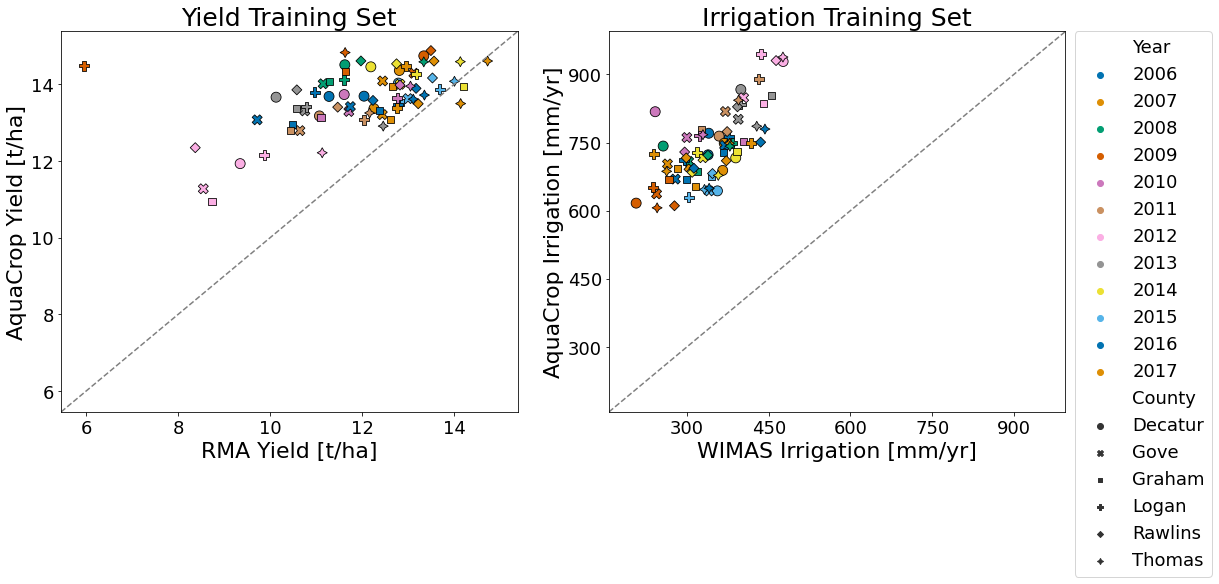

3997.1761935299364

In [20]:
modelResults([0.96, 1.05, 33.7, 100, 0.48, 0.3, 0.3, 100, 25], pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train')

## Change the smt to 60%

In [ ]:
modelResults([0.96, 1.05, 33.7, 100, 0.48, 0.3, 0.3, 60, 25], pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train')

## Run the PSO

In [22]:
#ccx, kc, wp, wpy, hi, kcdcl, rtm, smt, maxirr
lb = [0.650, 1.0, 30.0, 75.0, 0.48, 0.1, 0.2, 45.0, (31.8*0.3)] # maxx
ub = [0.99, 1.10, 35.00, 125.0, 0.52, 0.5, 0.3, 90.0, (31.8+0.5)]

## Calibration 1 (didn't get the last message indicating calibration is done)

In [23]:

xopt1, fopt1 = pso(fitnessCalc, lb, ub, minfunc = 5000, swarmsize=100, maxiter=50, args = (pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train'))


Stopping search: Swarm best objective change less than 5000


In [24]:
xopt1

array([  0.92229419,   1.0264256 ,  35.        , 110.73694092,
         0.51743519,   0.5       ,   0.21765339,  45.        ,
         9.54      ])

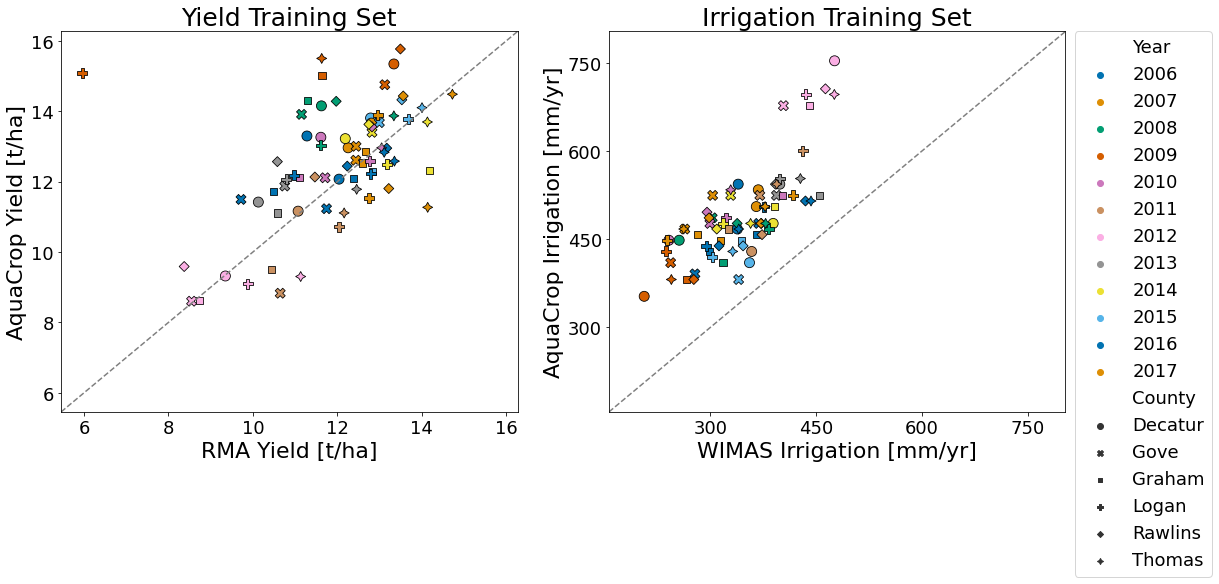

726.285468359935

In [26]:
modelResults([ 0.92229419,   1.0264256 ,  35.        , 110.73694092,
         0.51743519,   0.5       ,   0.21765339,  45.        ,
         9.54], pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train')

## Trial and Error
Reduced the MaxIrr from 9.54 to 6.54 - change in yield with little to no change in irrigation

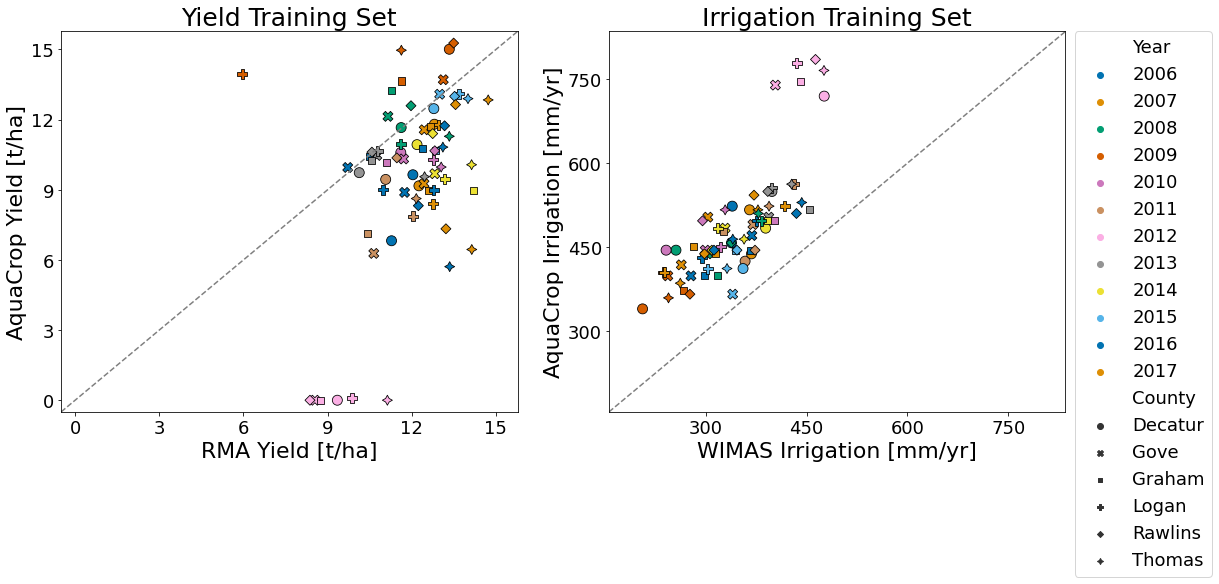

545.7252477128187

In [48]:
modelResults([ 0.92229419,   1.0264256 ,  35.        , 110.73694092,
         0.51743519,   0.5       ,   0.21765339,  45.        ,
         6.54], pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train')

Increased the SMT to 55 

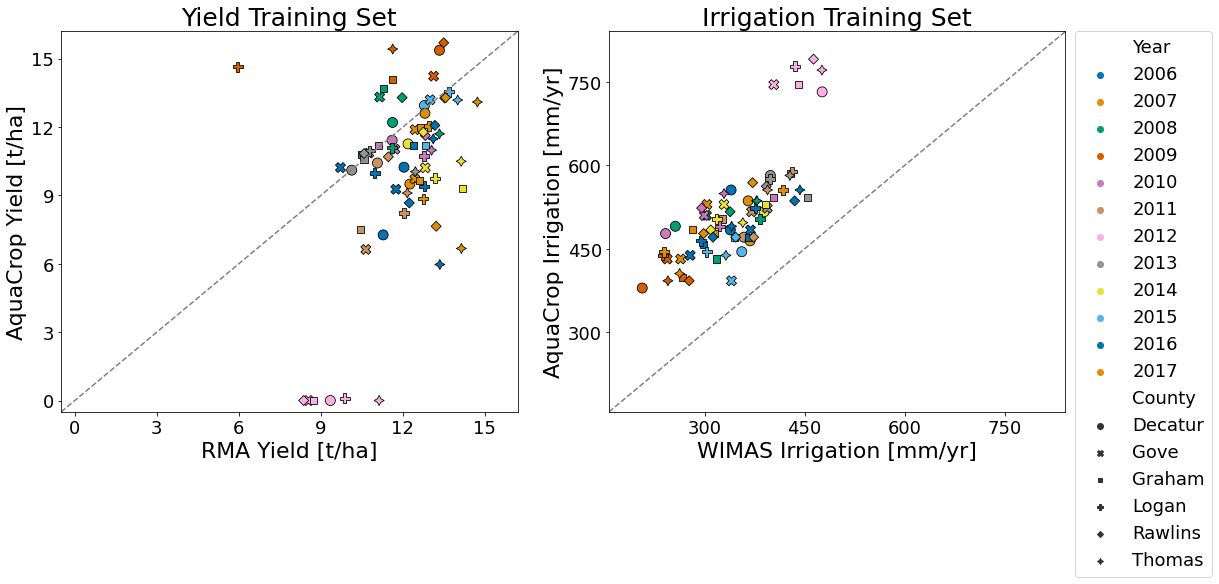

781.0497229174074

In [54]:
modelResults([ 0.92229419,   1.0264256 ,  35.        , 110.73694092,
         0.51743519,   0.5       ,   0.21765339,  55.        ,
         6.54], pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train')

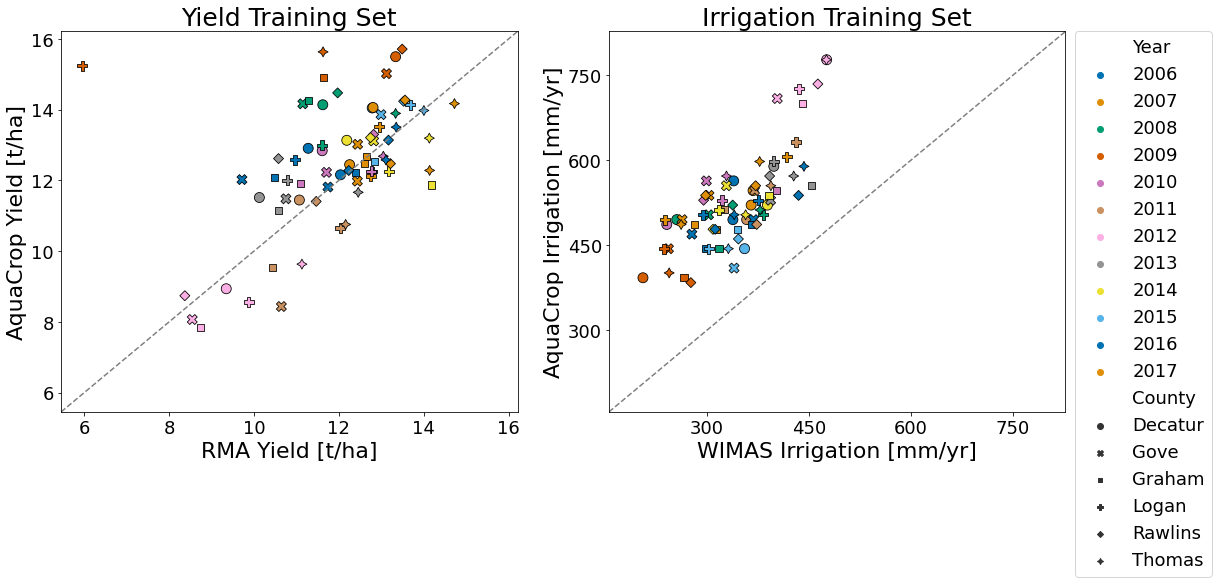

956.8832844256035

In [55]:
modelResults([ 0.92229419,   1.0264256 ,  35.        , 110.73694092,
         0.51743519,   0.5       ,   0.21765339,  55.        ,
         8.54], pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train')

In [53]:
xopt_increaseiter, fopt_increaseiter = pso(fitnessCalc, lb, ub, minfunc = 5000, swarmsize=100, maxiter=200, args = (pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train'))


Stopping search: Swarm best objective change less than 5000


In [56]:
xopt_increaseiter

array([ 0.93340382,  1.        , 33.43986689, 81.21013795,  0.52      ,
        0.24323543,  0.3       , 46.59767395,  9.54      ])

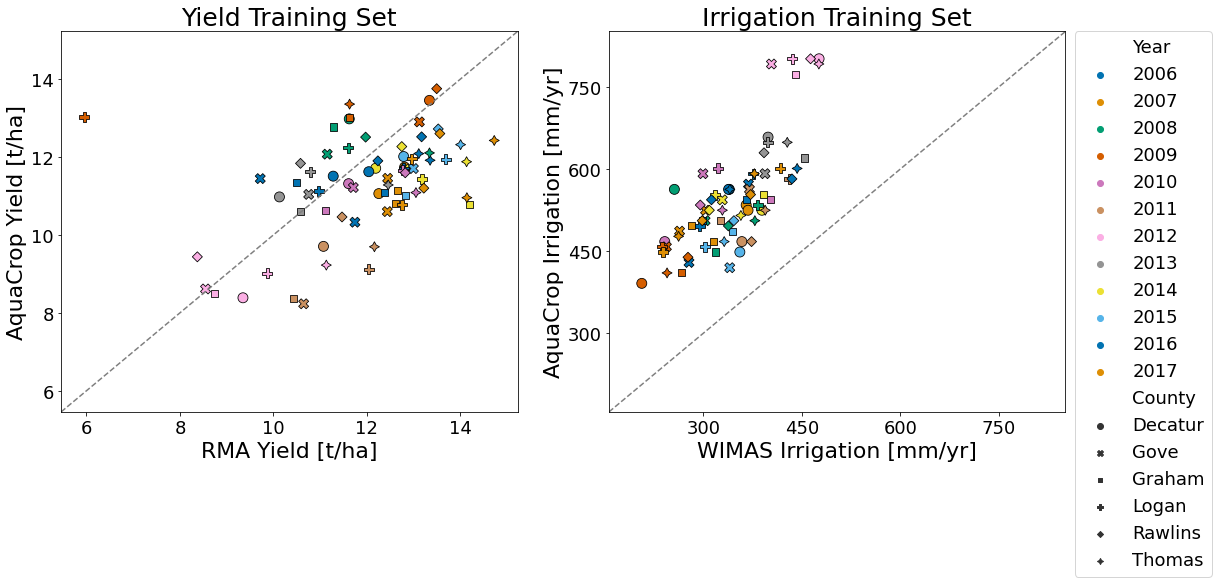

891.8676966856

In [57]:
modelResults([ 0.93340382,  1.        , 33.43986689, 81.21013795,  0.52      ,
        0.24323543,  0.3       , 46.59767395,  9.54], pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train')

# Calibration 2

In [27]:
xopt2, fopt2 = pso(fitnessCalc, lb, ub, minfunc = 500, swarmsize=100, maxiter=100, args = (pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train'))



Stopping search: Swarm best objective change less than 500


In [28]:
xopt2

array([  0.84424452,   1.        ,  33.4316526 , 125.        ,
         0.504996  ,   0.44321317,   0.25766716,  45.        ,
        25.19361408])

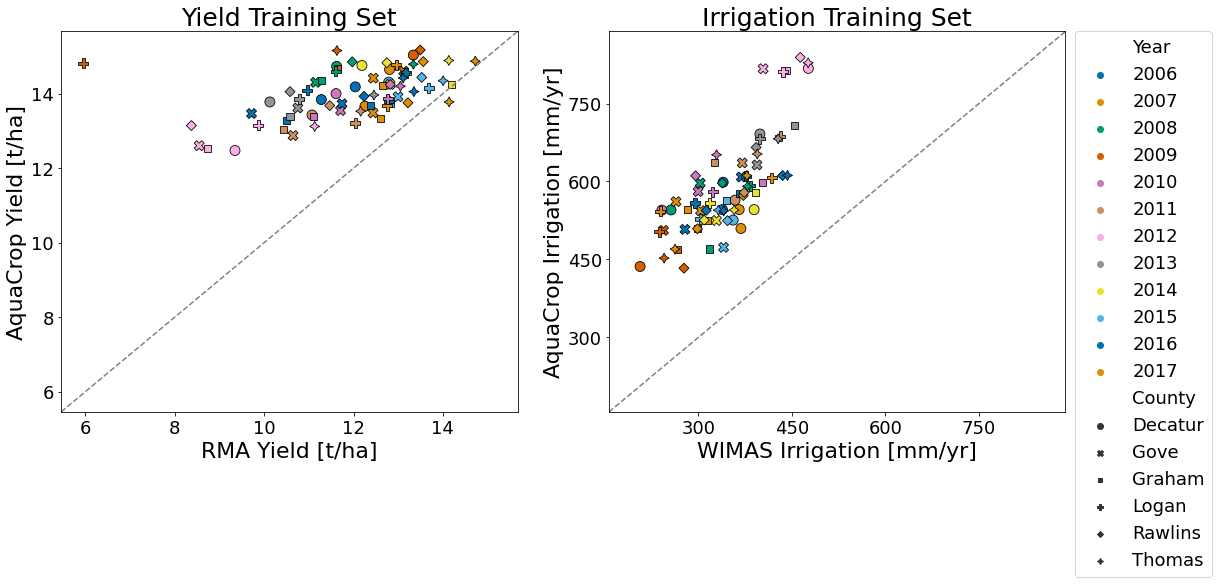

1534.3198387977538

In [39]:
modelResults([ 0.84424452,   1.        ,  33.4316526 , 125.        ,
         0.504996  ,   0.44321317,   0.25766716,  65.        ,
        18.19361408], pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train')

In [31]:
xopt3, fopt3 = pso(fitnessCalc, lb, ub, minfunc = 500, swarmsize=100, maxiter=200, args = (pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train'))


Stopping search: Swarm best objective change less than 500


In [32]:
xopt3

array([ 0.73358321,  1.        , 33.99054304, 93.10884641,  0.48447064,
        0.44612604,  0.2       , 45.        , 25.89743926])

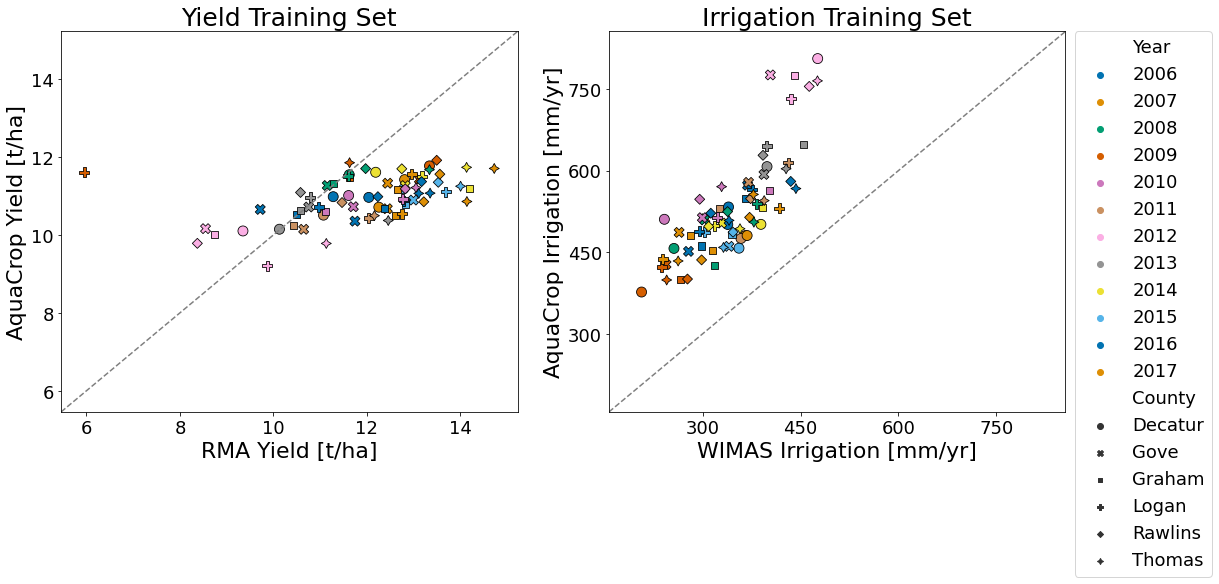

974.0669498735281

In [33]:
modelResults([ 0.73358321,  1.        , 33.99054304, 93.10884641,  0.48447064,
        0.44612604,  0.2       , 45.        , 25.89743926], pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train')

In [38]:
xopt4, fopt4 = pso(fitnessCalc, lb, ub, minfunc = 500, swarmsize=100, maxiter=200, args = (pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train'))


Stopping search: Swarm best objective change less than 500


In [41]:
xopt4

array([  0.99      ,   1.03093012,  33.8413967 , 100.93158928,
         0.49818008,   0.37421548,   0.3       ,  45.        ,
        32.3       ])

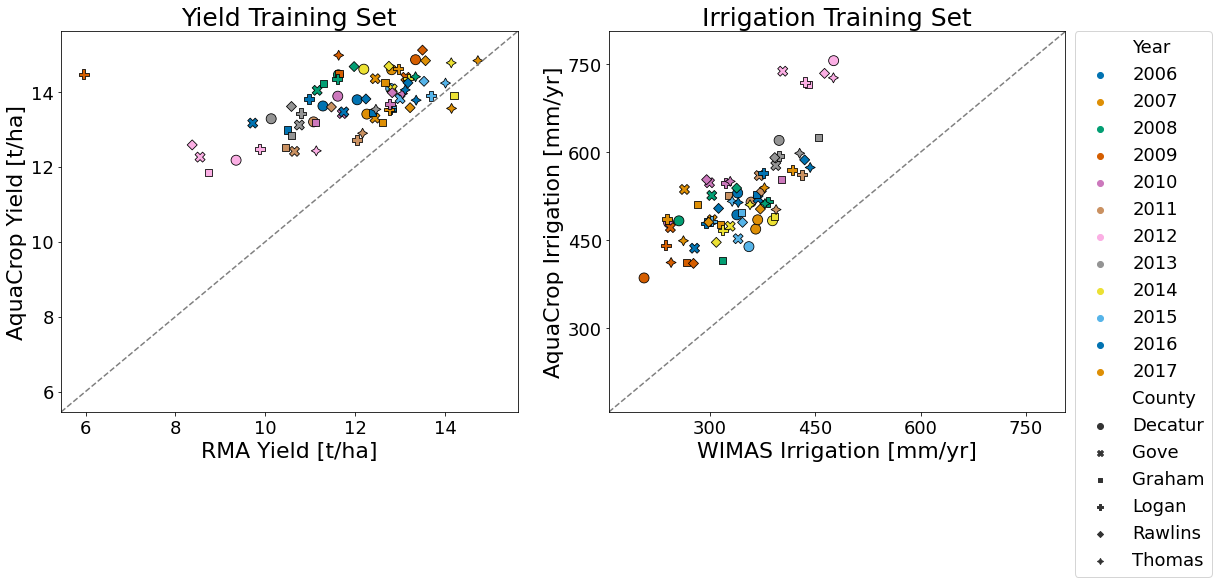

1162.8689520210257

In [42]:
modelResults([ 0.99      ,   1.03093012,  33.8413967 , 100.93158928,
         0.49818008,   0.37421548,   0.3       ,  45.        ,
        32.3], pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train')

In [43]:
xopt5, fopt5 = pso(fitnessCalc, lb, ub, minfunc = 50, swarmsize=300, maxiter=400, args = (pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train'))


Stopping search: Swarm best objective change less than 50


In [44]:
xopt5

array([  0.68086613,   1.01547661,  31.09922544, 115.54867171,
         0.50234958,   0.30160054,   0.29496914,  45.        ,
        23.97549094])

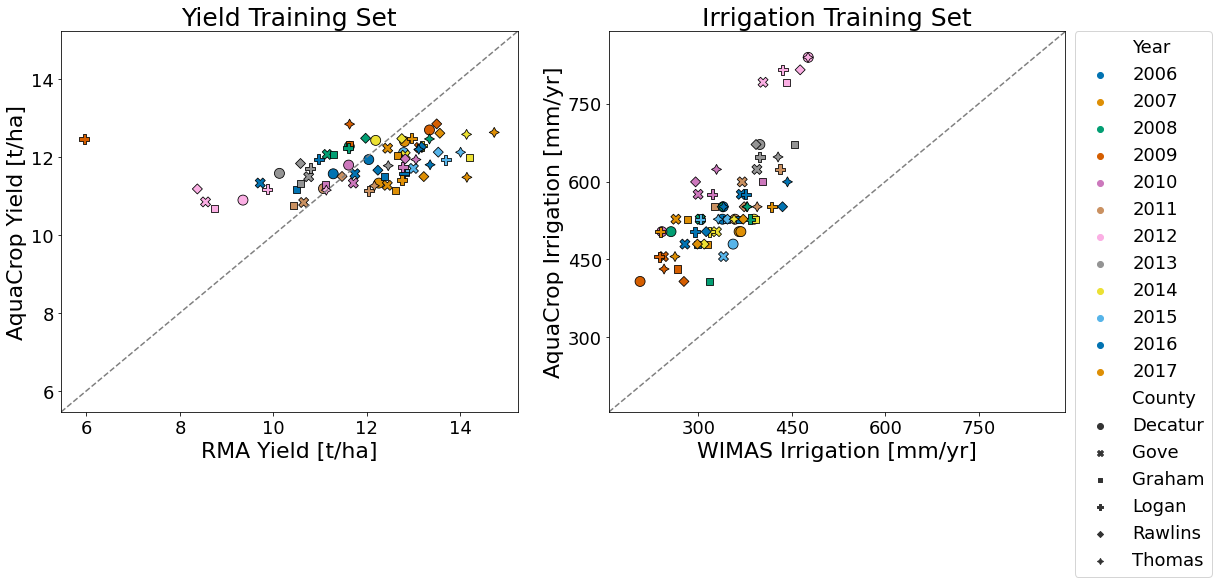

903.1843553331602

In [45]:
modelResults([ .68086613,   1.01547661,  31.09922544, 115.54867171,
         0.50234958,   0.30160054,   0.29496914,  45.        ,
        23.97549094], pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train')

In [58]:
xopt6, fopt6 = pso(fitnessCalc, lb, ub, minfunc =0.1 , swarmsize=300, maxiter=400, args = (pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train'))


Stopping search: Swarm best objective change less than 0.1


In [59]:
xopt6

array([  0.65      ,   1.        ,  30.92767895, 125.        ,
         0.50788749,   0.49651195,   0.2595364 ,  45.        ,
        31.8944642 ])

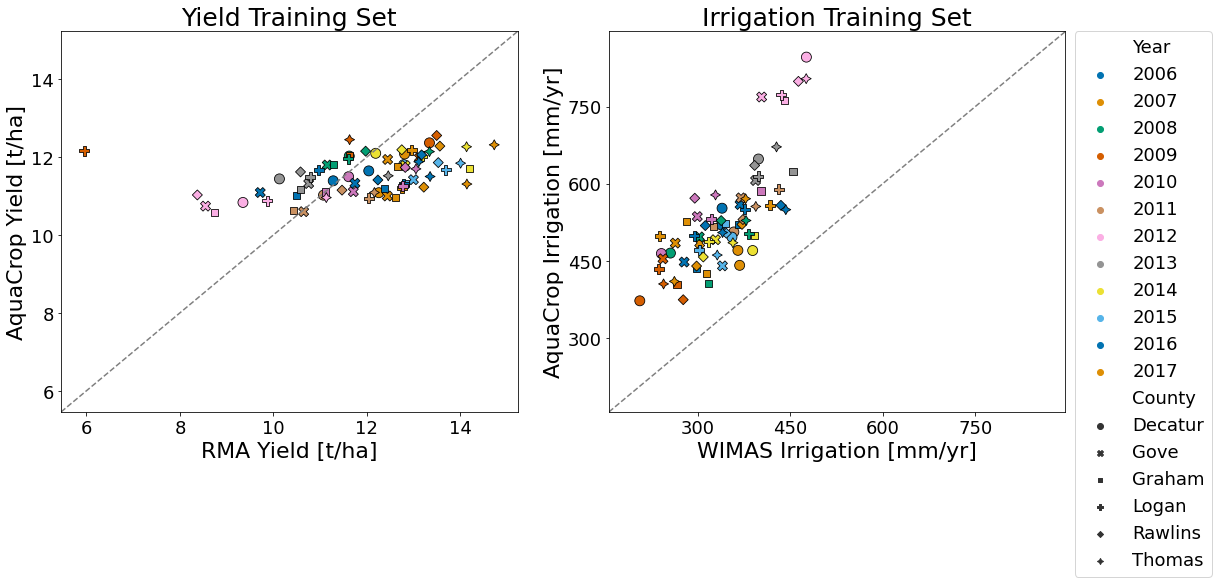

736.1829509496691

In [60]:
modelResults([ 0.65      ,   1.        ,  30.92767895, 125.        ,
         0.50788749,   0.49651195,   0.2595364 ,  45.        ,
        31.8944642], pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train')

# SMT calibration
### Change the SMT for the 4 growth stages

In [79]:
def runAllCounties2(x, *args):
    """ 
    
    """
    #start_time = time.time()
 # parameters to be calibrated
    param_names = pd.DataFrame(x)
    param_names['rownum'] = param_names.reset_index().index 
    param_names = param_names.rename(columns = {param_names.columns[0]: "value" })
    
    # duplicate param names 
    param_names = param_names.assign(**{f'value{i}': param_names['value'] for i in range(1, 4)})
    
    default_params, gridmet_data, soil_data, sa, observed_yield, observed_irrig, df_type = args # df type is either full, test or train
    
    sa_params = pd.DataFrame(np.array(sa).flatten())
    
    #sa_params = pd.DataFrame(sa_params_array) # from array to df
    
    #sa_params = sa_params
    sa_params['rownum'] = sa_params.reset_index().index 
    
    #sa_params_v2 = sa_params.copy() # used to keep the sa params in different font from the one use in AquaCrop 
    #sa_params_v2 = sa_params_v2.rename(columns = {sa_params_v2.columns[0]: "variable1" })  # rename the first column
    
    new_names = {
        'tb': 'Tbase', 
        'tu': 'Tupp',
        'ccs': 'SeedSize',
        'den': 'PlantPop',
        'eme': 'Emergence',
        'cgc':'CGC',
        'ccx': 'CCx',
        'sen': 'Senescence',
        'cdc': 'CDC',
        'mat': 'Maturity',
        'rtm': 'Zmin',
        'flolen': 'Flowering',
        'rtx': 'Zmax',
        'rtshp': 'fshape_r',
        'root': 'MaxRooting',
        'rtexup': 'SxTopQ',
        'rtexlw': 'SxBotQ',
         #Crop Transpiration
        'kc': 'Kcb',
        'kcdcl': 'fage',
         #Biomass and Yield
        'wp': 'WP',
        'wpy': 'WPy',
        'hi': 'HI0',
        'hipsflo': 'dHI_pre',
        'exc': 'exc',
        'hipsveg': 'a_HI',
        'hingsto': 'b_HI',
        'hinc': 'dHI0',
        'hilen': 'YldForm',
         #Water and Temperature Stress
        'polmn': 'Tmin_up',
        'polmx': 'Tmax_up',
        'pexup': 'p_up',
        'pexlw': 'p_lo',
        'pexshp': 'fshape_w',
        'smt': 'SMT',
        'maxirr': 'MaxIrr'
        }
    
    
    sa_params[0] = sa_params[0].replace(new_names) # rename the parameters to match the aquacrop params
    sa_params = sa_params.rename(columns = {sa_params.columns[0]: "variable2" })   

    sa_params['variable2'] = sa_params['variable2'].astype(str) # convert to string from TypeError: hasattr(): attribute name must be string
    #sa_params['variable2'] = sa_params['variable2'].astype(str)
    #sa_params['variable2'] = sa_params['variable2'].astype(str)
    
    sa_params_full = sa_params.merge(param_names) # with both the AquaCrop format and the sa names
    sa_params_full = sa_params_full.drop('rownum', axis = 1)

#rainfed_corn_calib = rainfed_corn_calib['0'].tolist()
#irrig_corn_calib = [item.strip("'") for item in irrig_corn_calib]
    sa_params_full = sa_params_full.reset_index()
    
    
    #print(sa_params_full)
    #default_params = inputData(pheno_df)
    
    irr_mngt = IrrigationManagement(irrigation_method=1, AppEff = 100)#, SMT = [SMT1, SMT2, SMT3, SMT4]) # 10 is a dummy variable
    #irr_mngt = IrrigationManagement(irrigation_method=2, IrrInterval=3, MaxIrr = 15)
    
    for index, row in sa_params_full.iterrows(): # add SMT vals to sa_params
        if row['variable2'] == 'SMT':
            irr_mngt.SMT = [row['value'], row['value1'], row['value2'], row['value3']][0]  # Update the SMT value
    
    
   # for index, row in sa_params_full.iterrows():        
        #if row['variable2'] == 'MaxIrr':
            #irr_mngt.MaxIrr = [row['value']]   # Update the MaxIrr value
    
    # remove SMT
    sa_params_full = sa_params_full[sa_params_full.variable2 != 'SMT']
    
    # update MaxIrr
    for index, row in sa_params_full.iterrows():
        if hasattr(irr_mngt, row['variable2']):
            setattr(irr_mngt, row['variable2'], row['value'])
            
    #for i in irrig_corn_calib: # update the SMT
            #if hasattr(irr_mngt, str(i)):
               #setattr(irr_mngt, str(i), None) 
    
    print(irr_mngt.SMT)
    #print(irr_mngt.MaxIrr)
    
    crop_calibrated = Crop(c_name = default_params['crop'].item(),
                           # growth stages
                           PlantPop = 50000,
                           CalendarType = 1,
                           SwitchGDD = 1,  #Convert calendar to gdd mode if inputs are given in calendar days (0 = No; 1 = Yes)
                           planting_date = default_params['planting_date'].item(),
                           Emergence = default_params['Emergence'].item(),
                           Senescence = default_params['Senescence'].item(),
                           Maturity = default_params['Maturity'].item(),
                           MaxRooting = default_params['MaxRooting'].item(),
                           HIstart = default_params['HIstart'].item(),
                           Flowering = default_params['Flowering'].item(),
                           YldForm = default_params['YldForm'].item(),
                
                            # canopy cover profile
                           CGC = default_params['CGC'].item(),
                           CDC = default_params['CDC'].item()
                          )
    
    for index, row in sa_params_full.iterrows():
        if hasattr(crop_calibrated, row['variable2']):
            setattr(crop_calibrated, row['variable2'], row['value']) 
    
    
    #print(crop_calibrated.HI0)
   # print(crop_calibrated.WP)
    #print(crop_calibrated.CCx)
    #for i in irrig_corn_calib: # update crop param
            #if hasattr(crop_calibrated, str(i)):
               #setattr(crop_calibrated, str(i), None)        
    
    initWC = InitialWaterContent(value=['FC'])
    
    # run model for each county
    calib_counties = []
    
    model_counties = []
    model_results_canopy = []
    
    counter_county = -1
    
    for county in gridmet_data:
        counter_county += 1
        model_results_yield = []
        #model_results_canopy = []
        gridmet_df = [v for k, v in county.groupby('Year')]
        
        #print(counter_county)
        #for soil in soil_irrig:
        counter_year = -1    
            #for custom_soil in soil:
        for met in gridmet_df: # add second counter 
                            counter_year += 1
                            countyname = met['crop_mn_codeyear'].str.replace(r'^.*?(?=[a-z, A-Z])', '', regex=True).unique()[0].capitalize()
                            #print(county)
                            yr = met['Year'].unique()[0]
                            
                            #print(counter_year)
                            #print(yr)
                            
                            wdf = met[['MinTemp', 
                                                 'MaxTemp',
                                                 'Precipitation', 
                                                 'ReferenceET',
                                                 'Date'
                                                ]]

                            sim_start = f'{yr}/01/01' #dates to match crop data
                            sim_end = f'{yr}/12/31'
                            #print(sim_start)


                            custom_soil = soil_data[counter_county][counter_year]

                            #print(custom_soil)

                            # run model
                            model_c = AquaCropModel(sim_start,sim_end,wdf,custom_soil,crop_calibrated,initWC, irr_mngt)
                            model_c.run_model(till_termination=True) # run model till the end
                            model_c_et = model_c._outputs.water_flux
                            model_c_irr = model_c._outputs.final_stats
                            #model_c_water_storage = model_c._outputs.water_storage
                            #model_c_crp_grwth = model_c._outputs.crop_growth

                             # make year a column 
                            model_c_irr = model_c_irr.assign(Year =  model_c_irr['Harvest Date (YYYY/MM/DD)'].dt.year)
                            model_c_irr = model_c_irr.rename(columns={
                                               'Yield (tonne/ha)': 'Calib Yield (t/ha)',
                                               'Seasonal irrigation (mm)': 'Calib Irrigation (mm)'
                                               })

                            #model_c_irr = model_c_irr[['Year', 'Calib Yield (t/ha)', 'Calib Irrigation (mm)']]


                            model_results_yield.append(model_c_irr)
                            #model_results_canopy.append(model_c_crp_grwth)




                            model_results_df = pd.concat(model_results_yield)
                            model_results_df['County'] = countyname

                            #print(model_results_df)
                # compare models
                            model_comp = model_results_df.merge(observed_yield, how='inner', on=['Year', 'County', 'crop Type']).merge(observed_irrig, how='inner', on = ['Year', 'County', 'crop Type'])
                            model_comp = model_comp.assign(YieldUSDA = model_comp['Value']*0.0673)

                            model_comp = model_comp.dropna()
                            
        model_counties.append(model_comp)
                            
        model_counties_df = pd.concat(model_counties)
        #print(model_comp)

        start_year = min(model_counties_df.Year)
        end_year = max(model_counties_df.Year)

        total_years = end_year - start_year + 1

        split_year = start_year + int(total_years * 0.8)
        
        train = model_counties_df[model_counties_df['Year'] < split_year]
        
        test = model_counties_df[model_counties_df['Year'] >= split_year]
        #calib_counties.append(model_comp)
        
        #print(fitness)
        #print("program took", time.time() - start_time, "to run")
    #return(calib_counties)
    
    return model_counties_df, train, test

In [ ]:
runAllCounties2([ 0.65      ,   1.        ,  30.92767895, 125.        ,
         0.50788749,   0.49651195,   0.2595364 ,  [45., 43,56,80]       ,
        31.8944642], pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train')

In [80]:
def fitnessCalc2(x, *args):
    
        #df_type = *args[6]
    
        default_params, gridmet_data, soil_data, sa, observed_yield, observed_irrig, df_type = args
        
        if df_type == 'full':
            model_comp_full = runAllCounties2(x, *args)[0]

            model_comp_full = model_comp_full[model_comp_full.County != 'Sheridan']
            
            y_yield_full = model_comp_full[['YieldUSDA']]
            yhat_yield_full = model_comp_full[['Calib Yield (t/ha)']]

            y_irrig_full = model_comp_full[['irrig_depth']]
            yhat_irrig_full = model_comp_full[['Calib Irrigation (mm)']]


            std_yield_full = np.std(np.array(y_yield_full) - np.array(yhat_yield_full))
            std_irrig_full = np.std(np.array(y_irrig_full) - np.array(yhat_irrig_full))

            var_yield_full = std_yield_full**2
            var_irrig_full = std_irrig_full**2

            #var_yield = np.var(yhat_yield - y_yield)
            #var_irrig = np.var(yhat_irrig - y_irrig)
            #return var_yield, var_irrig
            #fitness = ((y[['YieldUSDA']]-yhat[['Calib Yield (t/ha)']])**2).sum() # Calculate fitness score based on AquaCrop performance
            #fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*(1/var_yield)).sum() #+ (var_irrig*((np.array(y_irrig)-np.array(yhat_irrig))**2)).sum().item()
            fitness_full = (((np.array(y_yield_full)-np.array(yhat_yield_full))**2)*np.array(1/var_yield_full)).sum().item() +(((np.array(y_irrig_full)-np.array(yhat_irrig_full))**2)*np.array(1/var_irrig_full)).sum().item()

            #fitness_list.append(fitness)
            return fitness_full
        
        
        elif df_type == 'train':
            model_comp_train = runAllCounties2(x, *args)[1]

            model_comp_train = model_comp_train[model_comp_train.County != 'Sheridan']
            
            y_yield_train = model_comp_train[['YieldUSDA']]
            yhat_yield_train = model_comp_train[['Calib Yield (t/ha)']]

            y_irrig_train = model_comp_train[['irrig_depth']]
            yhat_irrig_train = model_comp_train[['Calib Irrigation (mm)']]


            std_yield_train = np.std(np.array(y_yield_train) - np.array(yhat_yield_train))
            std_irrig_train = np.std(np.array(y_irrig_train) - np.array(yhat_irrig_train))

            var_yield_train = std_yield_train**2
            var_irrig_train = std_irrig_train**2

            #var_yield = np.var(yhat_yield - y_yield)
            #var_irrig = np.var(yhat_irrig - y_irrig)
            #return var_yield, var_irrig
            #fitness = ((y[['YieldUSDA']]-yhat[['Calib Yield (t/ha)']])**2).sum() # Calculate fitness score based on AquaCrop performance
            #fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*(1/var_yield)).sum() #+ (var_irrig*((np.array(y_irrig)-np.array(yhat_irrig))**2)).sum().item()
            fitness_train = (((np.array(y_yield_train)-np.array(yhat_yield_train))**2)*np.array(1/var_yield_train)).sum().item() +(((np.array(y_irrig_train)-np.array(yhat_irrig_train))**2)*np.array(1/var_irrig_train)).sum().item()

            #fitness_list.append(fitness)
            return fitness_train 
        
        
        elif df_type == 'test':
            model_comp_test = runAllCounties2(x, *args)[2]
            
            model_comp_test = model_comp_test[model_comp_test.County != 'Sheridan']

            y_yield_test = model_comp_test[['YieldUSDA']]
            yhat_yield_test = model_comp_test[['Calib Yield (t/ha)']]

            y_irrig_test = model_comp_test[['irrig_depth']]
            yhat_irrig_test = model_comp_test[['Calib Irrigation (mm)']]


            std_yield_test = np.std(np.array(y_yield_test) - np.array(yhat_yield_test))
            std_irrig_test = np.std(np.array(y_irrig_test) - np.array(yhat_irrig_test))

            var_yield_test = std_yield_test**2
            var_irrig_test = std_irrig_test**2

            #var_yield = np.var(yhat_yield - y_yield)
            #var_irrig = np.var(yhat_irrig - y_irrig)
            #return var_yield, var_irrig
            #fitness = ((y[['YieldUSDA']]-yhat[['Calib Yield (t/ha)']])**2).sum() # Calculate fitness score based on AquaCrop performance
            #fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*(1/var_yield)).sum() #+ (var_irrig*((np.array(y_irrig)-np.array(yhat_irrig))**2)).sum().item()
            fitness_test = (((np.array(y_yield_test)-np.array(yhat_yield_test))**2)*np.array(1/var_yield_test)).sum().item() +(((np.array(y_irrig_test)-np.array(yhat_irrig_test))**2)*np.array(1/var_irrig_test)).sum().item()

            #fitness_list.append(fitness)
            return fitness_test
        
        

In [92]:
fitnessCalc2([ 0.65      ,   1.        ,  30.92767895, 125.        ,
         0.50788749,   0.49651195,   0.2595364 ,  [45., 43,56,80]       ,
        31.8944642], pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train')

[45.0, 43, 56, 80]


1123.6499761197842

In [81]:
def modelResults2(x, *args):

# run the model using AquaCrop values for [ccx, kc, wp, wpy, hi, kcdcl, rtm, smt]
    default_params, gridmet_data, soil_data, sa, observed_yield, observed_irrig, df_type = args

    if df_type == 'full':
        full_model = runAllCounties2(x, *args)[0]
        
        full_model = full_model[full_model.County != 'Sheridan']

        yield_minimum = min(min(full_model['YieldUSDA']), min(full_model['Calib Yield (t/ha)']))
        yield_maximum = max(max(full_model['YieldUSDA']), max(full_model['Calib Yield (t/ha)']))


        fig, (yld, irrig) = plt.subplots(ncols=2, figsize=(18, 7))
        yld = sns.scatterplot(x="YieldUSDA", y="Calib Yield (t/ha)", hue="Year",
                              data=full_model, palette='colorblind', style="County", s=100,
                              edgecolor="black", legend=False, ax=yld)#.set(title='Full')
        yld.margins(x=0)
        #yld.axis('equal')
        #yld.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=12)
        yld.tick_params(axis='both', which='major', labelsize=18)
        yld.axline((0, 0), slope=1, color="grey", linestyle='--')
        yld.set(ylim=(yield_minimum-0.5, yield_maximum+0.5), xlim=(yield_minimum-0.5, yield_maximum+0.5))
        #yld.set_xlim(yield_minimum-0.5, yield_maximum+0.5)
        #yld.set_ylim(yield_minimum-0.5, yield_maximum+0.5)
        yld.xaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        yld.yaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        yld.set_ylabel('AquaCrop Yield [t/ha]', size=22)
        yld.set_xlabel('RMA Yield [t/ha]', size=22)
        yld.set_title('Yield Full Set', size = 25)



        irrig_minimum = min(min(full_model['irrig_depth']), min(full_model['Calib Irrigation (mm)']))
        irrig_maximum = max(max(full_model['irrig_depth']), max(full_model['Calib Irrigation (mm)']))

        # Create the figure and axes for Irrigation plot
        #plt.figure(figsize=(7,7))
        irrig = sns.scatterplot(x="irrig_depth", y="Calib Irrigation (mm)", hue="Year",
                                data=full_model, palette='colorblind', style="County", s=100,
                                edgecolor="black", legend='full')#.set(title='Full')
        irrig.margins(x=0)
        #irrig.axis('equal')
        irrig.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=18)
        irrig.tick_params(axis='both', which='major', labelsize=18)
        irrig.axline((0, 0), slope=1, color="grey", linestyle='--')
        irrig.set(ylim=(irrig_minimum-50, irrig_maximum+50), xlim=(irrig_minimum-50, irrig_maximum+50))
        #irrig.set_xlim(irrig_minimum-50, irrig_maximum+50)
        #irrig.set_ylim(irrig_minimum-50, irrig_maximum+50)
        irrig.xaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        irrig.yaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        irrig.set_ylabel('AquaCrop Irrigation [mm/yr]', size=22)
        irrig.set_xlabel('WIMAS Irrigation [mm/yr]', size=22)
        irrig.set_title('Irrigation Full Set', size = 25)

        plt.show()

        fitness = fitnessCalc2(x, *args)

        
        return fitness
    
    
    elif df_type == 'train':
        full_model_train = runAllCounties2(x, *args)[1]
        
        full_model_train = full_model_train[full_model_train.County != 'Sheridan']

        yield_minimum_train = min(min(full_model_train['YieldUSDA']), min(full_model_train['Calib Yield (t/ha)']))
        yield_maximum_train = max(max(full_model_train['YieldUSDA']), max(full_model_train['Calib Yield (t/ha)']))


        fig, (yld_train, irrig_train) = plt.subplots(ncols=2, figsize=(18, 7))
        yld_train = sns.scatterplot(x="YieldUSDA", y="Calib Yield (t/ha)", hue="Year",
                              data=full_model_train, palette='colorblind', style="County", s=100,
                              edgecolor="black", legend=False, ax=yld_train)#.set_title('Test')
        yld_train.margins(x=0)
        #yld_test.axis('equal')
        #yld_test.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=12)
        yld_train.tick_params(axis='both', which='major', labelsize=18)
        yld_train.axline((0, 0), slope=1, color="grey", linestyle='--')
        yld_train.set(ylim=(yield_minimum_train-0.5, yield_maximum_train+0.5), xlim=(yield_minimum_train-0.5, yield_maximum_train+0.5))
        #yld.set_xlim(yield_minimum-0.5, yield_maximum+0.5)
        #yld.set_ylim(yield_minimum-0.5, yield_maximum+0.5)
        yld_train.xaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        yld_train.yaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        #yld_test.set(ylim=(0, 20), xlim=(0, 20))
        yld_train.set_ylabel('AquaCrop Yield [t/ha]', size=22)
        yld_train.set_xlabel('RMA Yield [t/ha]', size=22)
        yld_train.set_title('Yield Training Set', size = 25)



        irrig_minimum_train = min(min(full_model_train['irrig_depth']), min(full_model_train['Calib Irrigation (mm)']))
        irrig_maximum_train = max(max(full_model_train['irrig_depth']), max(full_model_train['Calib Irrigation (mm)']))

        # Create the figure and axes for Irrigation plot
        #plt.figure(figsize=(7,7))
        irrig_train = sns.scatterplot(x="irrig_depth", y="Calib Irrigation (mm)", hue="Year",
                                data=full_model_train, palette='colorblind', style="County", s=100,
                                edgecolor="black", legend='full')#.set(title='Train')
        irrig_train.margins(x=0)
        #irrig_train.axis('equal')
        irrig_train.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=18)
        irrig_train.tick_params(axis='both', which='major', labelsize=18)
        irrig_train.axline((0, 0), slope=1, color="grey", linestyle='--')
        irrig_train.set(ylim=(irrig_minimum_train-50, irrig_maximum_train+50), xlim=(irrig_minimum_train-50, irrig_maximum_train+50))
        #irrig.set_xlim(irrig_minimum-50, irrig_maximum+50)
        #irrig.set_ylim(irrig_minimum-50, irrig_maximum+50)
        irrig_train.xaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        irrig_train.yaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        irrig_train.set_ylabel('AquaCrop Irrigation [mm/yr]', size=22)
        irrig_train.set_xlabel('WIMAS Irrigation [mm/yr]', size=22)
        irrig_train.set_title('Irrigation Training Set', size = 25)

        

        
        
        plt.show()

        fitness_train = fitnessCalc2(x, *args)

        return fitness_train
    
    
    
    elif df_type == 'test':
        full_model_test = runAllCounties2(x, *args)[2]
        
        full_model_test = full_model_test[full_model_test.County != 'Sheridan']

        yield_minimum_test = min(min(full_model_test['YieldUSDA']), min(full_model_test['Calib Yield (t/ha)']))
        yield_maximum_test = max(max(full_model_test['YieldUSDA']), max(full_model_test['Calib Yield (t/ha)']))


        #plt.figure(figsize=(7,7))
        fig, (yld_test, irrig_test) = plt.subplots(ncols=2, figsize=(18, 7))
        yld_test = sns.scatterplot(x="YieldUSDA", y="Calib Yield (t/ha)", hue="Year",
                              data=full_model_test, palette='colorblind', style="County", s=100,
                              edgecolor="black", legend=False, ax=yld_test)#.set_title('Test')
        yld_test.margins(x=0)
        #yld_test.axis('equal')
        #yld_test.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=12)
        yld_test.tick_params(axis='both', which='major', labelsize=18)
        yld_test.axline((0, 0), slope=1, color="grey", linestyle='--')
        yld_test.set(ylim=(yield_minimum_test-0.5, yield_maximum_test+0.5), xlim=(yield_minimum_test-0.5, yield_maximum_test+0.5))
        #yld.set_xlim(yield_minimum-0.5, yield_maximum+0.5)
        #yld.set_ylim(yield_minimum-0.5, yield_maximum+0.5)
        yld_test.xaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        yld_test.yaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        #yld_test.set(ylim=(0, 20), xlim=(0, 20))
        yld_test.set_ylabel('AquaCrop Yield [t/ha]', size=22)
        yld_test.set_xlabel('RMA Yield [t/ha]', size=22)
        yld_test.set_title('Yield Testing Set', size = 25)
        


        irrig_minimum_test = min(min(full_model_test['irrig_depth']), min(full_model_test['Calib Irrigation (mm)']))
        irrig_maximum_test = max(max(full_model_test['irrig_depth']), max(full_model_test['Calib Irrigation (mm)']))

        # Create the figure and axes for Irrigation plot
        #plt.figure(figsize=(7,7))
        irrig_test = sns.scatterplot(x="irrig_depth", y="Calib Irrigation (mm)", hue="Year",
                                data=full_model_test, palette='colorblind', style="County", s=100,
                                edgecolor="black", legend='full', ax=irrig_test)
        irrig_test.margins(x=0)
        #irrig_test.axis('equal')
        irrig_test.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=18)
        #plt.legend(fontsize='x-large', title_fontsize='40')
        irrig_test.tick_params(axis='both', which='major', labelsize=18)
        irrig_test.axline((0, 0), slope=1, color="grey", linestyle='--')
        #irrig_test.plot([0, 1000], [0, 1000], color='red', linestyle='--')
        #irrig.set_xlim(irrig_minimum-50, irrig_maximum+50)
        #irrig.set_ylim(irrig_minimum-50, irrig_maximum+50)
        #irrig_test.xlim(irrig_minimum_test)
        #irrig_test.ylim(irrig_minimum_test)
        #irrig_test.set(ylim=(0, 1000), xlim=(0, 1000))
        
        irrig_test.set(ylim=(irrig_minimum_test-50, irrig_maximum_test+50), xlim=(irrig_minimum_test-50, irrig_maximum_test+50))
        
        irrig_test.xaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        irrig_test.yaxis.set_major_locator(plt.MaxNLocator(nbins=6))
        irrig_test.set_ylabel('AquaCrop Irrigation [mm/yr]', size=22)
        irrig_test.set_xlabel('WIMAS Irrigation [mm/yr]', size=22)
        irrig_test.set_title('Irrigation Testing Set', size = 25)

        plt.show()

        fitness_test = fitnessCalc2(x, *args)

        return fitness_test



[15, 20, 45, 15]


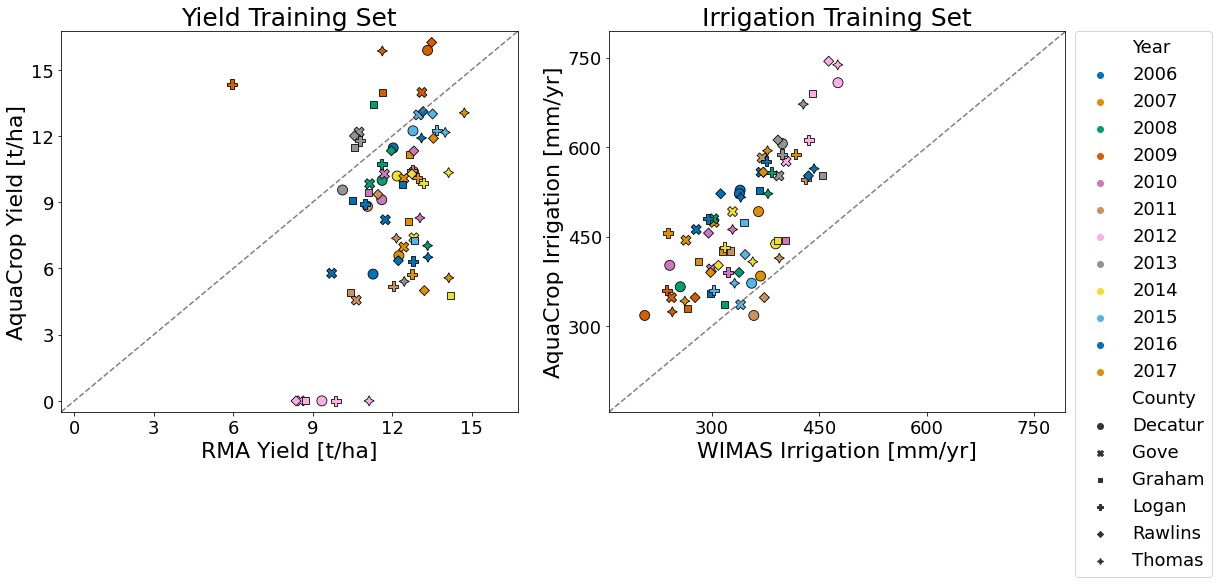

[15, 20, 45, 15]


423.68511919263176

In [75]:
#ccx, kc, wp, wpy, hi, kcdcl, rtm, smt, maxirr
#[ 0.93340382,  1.        , 33.43986689, 81.21013795,  0.52      ,
        #0.24323543,  0.3       , 46.59767395,  9.54]
#40,60,70,30
modelResults2([ 0.93340382,  1.        , 43.43986689, 81.21013795,  0.52      ,
        0.24323543,  0.3       , [15,20,45,15],  6], pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train')

In [ ]:
#ccx, kc, wp, wpy, hi, kcdcl, rtm, smt, maxirr
#[ 0.93340382,  1.        , 33.43986689, 81.21013795,  0.52      ,
        #0.24323543,  0.3       , 46.59767395,  9.54]
#40,60,70,30
#50 40 40 40
modelResults2([ 0.93340382,  1.        , 33.43986689, 81.21013795,  0.52      ,
        0.24323543,  0.3       , [20, 40, 70, 30],  5], pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train')

[20, 40, 70, 30]


In [98]:
lb2 = [0.650, 1.0, 30.0, 75.0, 0.48, 0.1, 0.2, (45.0,45.0,45.0,45.0), (31.8*0.3)] # maxx
ub2 = [0.99, 1.10, 35.00, 125.0, 0.52, 0.5, 0.3, (90.0,90,90,90), (31.8+0.5)]

xopt7, fopt7 = pso(fitnessCalc, lb2, ub2, minfunc = 5000, swarmsize=10, maxiter=10, args = (pheno_df, gridmet, soil_irrig, irrig_corn_calib, irrig_rma_yield, irrig_depth, 'train'))

/home/jupyter-wndlovu/.local/lib/python3.9/site-packages/pyswarm/pso.py:66: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lb = np.array(lb)
/home/jupyter-wndlovu/.local/lib/python3.9/site-packages/pyswarm/pso.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ub = np.array(ub)


TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

# Generic function working with for loop that check the output dataframe

In [42]:
def objFun(x, *args):
    """ 
    
    """
    #start_time = time.time()
 # parameters to be calibrated
    param_names = pd.DataFrame(x)
    param_names['rownum'] = param_names.reset_index().index 
    param_names = param_names.rename(columns = {param_names.columns[0]: "value" })
    
    
    #default_params, gridmet_data, soil_data, sa = args
    
    #default_params, wdf, custom_soil, sa = args
    
    default_params, sa = args
    
    sa_params = pd.DataFrame(np.array(sa).flatten())
    
    #sa_params = pd.DataFrame(sa_params_array) # from array to df
    
    #sa_params = sa_params
    sa_params['rownum'] = sa_params.reset_index().index 
    
    #sa_params_v2 = sa_params.copy() # used to keep the sa params in different font from the one use in AquaCrop 
    #sa_params_v2 = sa_params_v2.rename(columns = {sa_params_v2.columns[0]: "variable1" })  # rename the first column
    
    new_names = {
        'tb': 'Tbase', 
        'tu': 'Tupp',
        'ccs': 'SeedSize',
        'den': 'PlantPop',
        'eme': 'Emergence',
        'cgc':'CGC',
        'ccx': 'CCx',
        'sen': 'Senescence',
        'cdc': 'CDC',
        'mat': 'Maturity',
        'rtm': 'Zmin',
        'flolen': 'Flowering',
        'rtx': 'Zmax',
        'rtshp': 'fshape_r',
        'root': 'MaxRooting',
        'rtexup': 'SxTopQ',
        'rtexlw': 'SxBotQ',
         #Crop Transpiration
        'kc': 'Kcb',
        'kcdcl': 'fage',
         #Biomass and Yield
        'wp': 'WP',
        'wpy': 'WPy',
        'hi': 'HI0',
        'hipsflo': 'dHI_pre',
        'exc': 'exc',
        'hipsveg': 'a_HI',
        'hingsto': 'b_HI',
        'hinc': 'dHI0',
        'hilen': 'YldForm',
         #Water and Temperature Stress
        'polmn': 'Tmin_up',
        'polmx': 'Tmax_up',
        'pexup': 'p_up',
        'pexlw': 'p_lo',
        'pexshp': 'fshape_w',
        'smt': 'SMT'
        }
    
    
    sa_params[0] = sa_params[0].replace(new_names) # rename the parameters to match the aquacrop params
    sa_params = sa_params.rename(columns = {sa_params.columns[0]: "variable2" })   

    sa_params['variable2'] = sa_params['variable2'].astype(str) # convert to string from TypeError: hasattr(): attribute name must be string
    
    
    sa_params_full = sa_params.merge(param_names) # with both the AquaCrop format and the sa names
    sa_params_full = sa_params_full.drop('rownum', axis = 1)

#rainfed_corn_calib = rainfed_corn_calib['0'].tolist()
#irrig_corn_calib = [item.strip("'") for item in irrig_corn_calib]
    sa_params_full = sa_params_full.reset_index()
    
    #default_params = inputData(pheno_df)
    
    irr_mngt = IrrigationManagement(irrigation_method=1) # 10 is a dummy variable
    
    for index, row in sa_params_full.iterrows():
        if row['variable2'] == 'SMT':
            
            irr_mngt.SMT = [row['value']] * 4  # Update the SMT value
    
            
    #for i in irrig_corn_calib: # update the SMT
            #if hasattr(irr_mngt, str(i)):
               #setattr(irr_mngt, str(i), None) 
    
    #print(irr_mngt.SMT)
    
    crop_calibrated = Crop(c_name = default_params['crop'].item(),
                           # growth stages
                           CalendarType = 1,
                           SwitchGDD = 1,  #Convert calendar to gdd mode if inputs are given in calendar days (0 = No; 1 = Yes)
                           planting_date = default_params['planting_date'].item(),
                           Emergence = default_params['Emergence'].item(),
                           Senescence = default_params['Senescence'].item(),
                           Maturity = default_params['Maturity'].item(),
                           MaxRooting = default_params['MaxRooting'].item(),
                           HIstart = default_params['HIstart'].item(),
                           Flowering = default_params['Flowering'].item(),
                           YldForm = default_params['YldForm'].item(),
                
                            # canopy cover profile
                           CGC = default_params['CGC'].item(),
                           CDC = default_params['CDC'].item()
                          )
    
    for index, row in sa_params_full.iterrows():
        if hasattr(crop_calibrated, row['variable2']):
            setattr(crop_calibrated, row['variable2'], row['value']) 
    
    
    #print(crop_calibrated.HI0)
    #print(crop_calibrated.WP)
    #print(crop_calibrated.CCx)
    #for i in irrig_corn_calib: # update crop param
            #if hasattr(crop_calibrated, str(i)):
               #setattr(crop_calibrated, str(i), None)        
    
    initWC = InitialWaterContent(value=['FC'])
    
    # run model for each county
    

    #print(sim_start
    #for yea                        # run model
    model_c = AquaCropModel(sim_start,sim_end,wdf,custom_soil,crop_calibrated,initWC, irr_mngt)
    model_c.run_model(till_termination=True) # run model till the end
    model_c_et = model_c._outputs.water_flux
    model_c_irr = model_c._outputs.final_stats
                            #model_c_water_storage = model_c._outputs.water_storage
                            #model_c_crp_grwth = model_c._outputs.crop_growth

                             # make year a column 
    model_c_irr = model_c_irr.assign(Year =  model_c_irr['Harvest Date (YYYY/MM/DD)'].dt.year)
    model_c_irr = model_c_irr.rename(columns={
                                               'Yield (tonne/ha)': 'Calib Yield (t/ha)',
                                               'Seasonal irrigation (mm)': 'Calib Irrigation (mm)'
                                               })

                            #model_c_irr = model_c_irr[['Year', 'Calib Yield (t/ha)', 'Calib Irrigation (mm)']]


    model_results_yield.append(model_c_irr)
                            #model_results_canopy.append(model_c_crp_grwth)


     # trying to make the fitness to only work when we have the full model results
    model_results_df = pd.concat(model_results_yield)
    model_results_df['County'] = countyname

    #print(model_results_df)
    
    #print(len(model_results_df['Year'].unique()))
    
    #model_results_df['Year'].unique()) == 15:
                    # compare models
    model_comp = model_results_df.merge(irrig_usda, how='inner', on=['Year', 'County', 'crop Type']).merge(irrig_depth, how='inner', on = ['Year', 'County', 'crop Type'])
    model_comp = model_comp.assign(YieldUSDA = model_comp['Value']*0.0673)



                    #calib_counties.append(model_comp)
    y_yield = model_comp[['YieldUSDA']]
    yhat_yield = model_comp[['Calib Yield (t/ha)']]

    y_irrig = model_comp[['irrig_depth']]
    yhat_irrig = model_comp[['Calib Irrigation (mm)']]


    var_yield = y_yield.var()
    var_irrig = y_irrig.var()

                #return var_yield, var_irrig
                #fitness = ((y[['YieldUSDA']]-yhat[['Calib Yield (t/ha)']])**2).sum() # Calculate fitness score based on AquaCrop performance
                #fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*(1/var_yield)).sum() #+ (var_irrig*((np.array(y_irrig)-np.array(yhat_irrig))**2)).sum().item()
    fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*np.array(1/var_yield)).sum().item() +(((np.array(y_irrig)-np.array(yhat_irrig))**2)*np.array(1/var_irrig)).sum().item()

    print(model_comp)
        #print(fitness)    #fitness_list.append(fitness)

                #print("program took", time.time() - start_time, "to run")
                #return(calib_counties)

    return fitness
    # Perform further operations on concatenated_result
    #print(concatenated_result)
    
    #else:
        #print("this is not the full df.")

    

In [22]:
irrig_corn = np.array(pd.read_csv(wd + '/eggs/data/irrigated_corn_calibration_params.csv'))

In [43]:
def objFun(x, *args):
    """ 
    
    """
    #start_time = time.time()
 # parameters to be calibrated
    param_names = pd.DataFrame(x)
    param_names['rownum'] = param_names.reset_index().index 
    param_names = param_names.rename(columns = {param_names.columns[0]: "value" })
    
    
    #default_params, gridmet_data, soil_data, sa = args
    
    #default_params, wdf, custom_soil, sa = args
    
    default_params, sa = args
    
    sa_params = pd.DataFrame(np.array(sa).flatten())
    
    #sa_params = pd.DataFrame(sa_params_array) # from array to df
    
    #sa_params = sa_params
    sa_params['rownum'] = sa_params.reset_index().index 
    
    #sa_params_v2 = sa_params.copy() # used to keep the sa params in different font from the one use in AquaCrop 
    #sa_params_v2 = sa_params_v2.rename(columns = {sa_params_v2.columns[0]: "variable1" })  # rename the first column
    
    new_names = {
        'tb': 'Tbase', 
        'tu': 'Tupp',
        'ccs': 'SeedSize',
        'den': 'PlantPop',
        'eme': 'Emergence',
        'cgc':'CGC',
        'ccx': 'CCx',
        'sen': 'Senescence',
        'cdc': 'CDC',
        'mat': 'Maturity',
        'rtm': 'Zmin',
        'flolen': 'Flowering',
        'rtx': 'Zmax',
        'rtshp': 'fshape_r',
        'root': 'MaxRooting',
        'rtexup': 'SxTopQ',
        'rtexlw': 'SxBotQ',
         #Crop Transpiration
        'kc': 'Kcb',
        'kcdcl': 'fage',
         #Biomass and Yield
        'wp': 'WP',
        'wpy': 'WPy',
        'hi': 'HI0',
        'hipsflo': 'dHI_pre',
        'exc': 'exc',
        'hipsveg': 'a_HI',
        'hingsto': 'b_HI',
        'hinc': 'dHI0',
        'hilen': 'YldForm',
         #Water and Temperature Stress
        'polmn': 'Tmin_up',
        'polmx': 'Tmax_up',
        'pexup': 'p_up',
        'pexlw': 'p_lo',
        'pexshp': 'fshape_w',
        'smt': 'SMT'
        }
    
    
    sa_params[0] = sa_params[0].replace(new_names) # rename the parameters to match the aquacrop params
    sa_params = sa_params.rename(columns = {sa_params.columns[0]: "variable2" })   

    sa_params['variable2'] = sa_params['variable2'].astype(str) # convert to string from TypeError: hasattr(): attribute name must be string
    
    
    sa_params_full = sa_params.merge(param_names) # with both the AquaCrop format and the sa names
    sa_params_full = sa_params_full.drop('rownum', axis = 1)

#rainfed_corn_calib = rainfed_corn_calib['0'].tolist()
#irrig_corn_calib = [item.strip("'") for item in irrig_corn_calib]
    sa_params_full = sa_params_full.reset_index()
    
    #default_params = inputData(pheno_df)
    
    irr_mngt = IrrigationManagement(irrigation_method=1) # 10 is a dummy variable
    
    for index, row in sa_params_full.iterrows():
        if row['variable2'] == 'SMT':
            
            irr_mngt.SMT = [row['value']] * 4  # Update the SMT value
    
            
    #for i in irrig_corn_calib: # update the SMT
            #if hasattr(irr_mngt, str(i)):
               #setattr(irr_mngt, str(i), None) 
    
    #print(irr_mngt.SMT)
    
    crop_calibrated = Crop(c_name = default_params['crop'].item(),
                           # growth stages
                           CalendarType = 1,
                           SwitchGDD = 1,  #Convert calendar to gdd mode if inputs are given in calendar days (0 = No; 1 = Yes)
                           planting_date = default_params['planting_date'].item(),
                           Emergence = default_params['Emergence'].item(),
                           Senescence = default_params['Senescence'].item(),
                           Maturity = default_params['Maturity'].item(),
                           MaxRooting = default_params['MaxRooting'].item(),
                           HIstart = default_params['HIstart'].item(),
                           Flowering = default_params['Flowering'].item(),
                           YldForm = default_params['YldForm'].item(),
                
                            # canopy cover profile
                           CGC = default_params['CGC'].item(),
                           CDC = default_params['CDC'].item()
                          )
    
    for index, row in sa_params_full.iterrows():
        if hasattr(crop_calibrated, row['variable2']):
            setattr(crop_calibrated, row['variable2'], row['value']) 
    
    
    #print(crop_calibrated.HI0)
    #print(crop_calibrated.WP)
    #print(crop_calibrated.CCx)
    #for i in irrig_corn_calib: # update crop param
            #if hasattr(crop_calibrated, str(i)):
               #setattr(crop_calibrated, str(i), None)        
    
    initWC = InitialWaterContent(value=['FC'])
    
    # run model for each county
    

    #print(sim_start
    #for yea                        # run model
    model_c = AquaCropModel(sim_start,sim_end,wdf,custom_soil,crop_calibrated,initWC, irr_mngt)
    model_c.run_model(till_termination=True) # run model till the end
    model_c_et = model_c._outputs.water_flux
    model_c_irr = model_c._outputs.final_stats
                            #model_c_water_storage = model_c._outputs.water_storage
                            #model_c_crp_grwth = model_c._outputs.crop_growth

                             # make year a column 
    model_c_irr = model_c_irr.assign(Year =  model_c_irr['Harvest Date (YYYY/MM/DD)'].dt.year)
    model_c_irr = model_c_irr.rename(columns={
                                               'Yield (tonne/ha)': 'Calib Yield (t/ha)',
                                               'Seasonal irrigation (mm)': 'Calib Irrigation (mm)'
                                               })

                            #model_c_irr = model_c_irr[['Year', 'Calib Yield (t/ha)', 'Calib Irrigation (mm)']]


    model_results_yield.append(model_c_irr)
                            #model_results_canopy.append(model_c_crp_grwth)


     # trying to make the fitness to only work when we have the full model results
    model_results_df = pd.concat(model_results_yield)
    model_results_df['County'] = countyname

    #print(model_results_df)
    
    #print(len(model_results_df['Year'].unique()))
    
    #model_results_df['Year'].unique()) == 15:
                    # compare models
    model_comp = model_results_df.merge(irrig_usda, how='inner', on=['Year', 'County', 'crop Type']).merge(irrig_depth, how='inner', on = ['Year', 'County', 'crop Type'])
    model_comp = model_comp.assign(YieldUSDA = model_comp['Value']*0.0673)




    return model_comp
    # Perform further operations on concatenated_result
    #print(concatenated_result)
    
    #else:
        #print("this is not the full df.")

    

In [ ]:
                    #calib_counties.append(model_comp)
    y_yield = model_comp[['YieldUSDA']]
    yhat_yield = model_comp[['Calib Yield (t/ha)']]

    y_irrig = model_comp[['irrig_depth']]
    yhat_irrig = model_comp[['Calib Irrigation (mm)']]


    var_yield = y_yield.var()
    var_irrig = y_irrig.var()

                #return var_yield, var_irrig
                #fitness = ((y[['YieldUSDA']]-yhat[['Calib Yield (t/ha)']])**2).sum() # Calculate fitness score based on AquaCrop performance
                #fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*(1/var_yield)).sum() #+ (var_irrig*((np.array(y_irrig)-np.array(yhat_irrig))**2)).sum().item()
    fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*np.array(1/var_yield)).sum().item() +(((np.array(y_irrig)-np.array(yhat_irrig))**2)*np.array(1/var_irrig)).sum().item()

    print(model_comp)
        #print(fitness)    #fitness_list.append(fitness)

                #print("program took", time.time() - start_time, "to run")
                #return(calib_counties)


## Test that the output is one df per county

In [ ]:
lb = [0.650, 1.0, 30.0, 75.0, 0.48, 0.1, 0.2, 45.0]
ub = [0.99, 1.10, 35.00, 125.0, 0.52, 0.5, 0.3, 90.0]


comp_results = []
calib_results = []

calib_counties = []
    
    #model_results_canopy = []
    
counter_county = -1
    
for county in gridmet:
        counter_county += 1
        model_results_yield = []
        #model_results_canopy = []
        gridmet_df = [v for k, v in county.groupby('Year')]
        #for soil in soil_irrig:
        counter_year = -1   
        
        #print(counter_county)
            #for custom_soil in soil:
        for met in gridmet_df: # add second counter 
                            counter_year += 1
                            countyname = met['crop_mn_codeyear'].str.replace(r'^.*?(?=[a-z, A-Z])', '', regex=True).unique()[0].capitalize()
                            #print(county)
                            yr = met['Year'].unique()[0]
                            
                            #print(counter_year)
                            print(yr)
                            
                            wdf = met[['MinTemp', 
                                                 'MaxTemp',
                                                 'Precipitation', 
                                                 'ReferenceET',
                                                 'Date'
                                                ]]

                            sim_start = f'{yr}/01/01' #dates to match crop data
                            sim_end = f'{yr}/12/31'
                            
                            
                            #print(sim_start)
                            #print(sim_end)


                            custom_soil = soil_irrig[counter_county][counter_year]
                            
                            #print(custom_soil)
                            
                            
                            
                            
                            #full_model = objFun([0.650, 1.0, 30.0, 75.0, 0.48, 0.1, 0.2, 45.0], pheno_df, irrig_corn)

                            #full_model2 = pd.DataFrame(full_model)
                            #print(full_model)
                            #print(len(full_model2))
                            
                            #if counter_year == 15:
                                
                                #print('gull')
                            xopt, fopt = pso(objFun, lb, ub, args = (pheno_df,irrig_corn)) 
                                
                            #xopt, fopt = pso(objFun, lb, ub, args = (pheno_df, gridmet, soil_irrig, irrig_corn))
                                
                            #else:
                                #print('nah')
         
        #comp_results.append(full_model)
        #calib_results.append(xopt, fopt)

In [ ]:
xopt, fopt = pso(objFun_true, lb, ub, args = (pheno_df, gridmet, soil_irrig, irrig_corn))

In [166]:
xopt

NameError: name 'xopt' is not defined

In [143]:
full_model

415.2574968501683

In [141]:
len(full_model)

TypeError: object of type 'float' has no len()

In [127]:
full_model.dtypes

Series([], dtype: object)

In [106]:
def objFun(x, *args):
    """
    
    """
    # start_time = time.time()
    # parameters to be calibrated
    param_names = pd.DataFrame(x)
    param_names['rownum'] = param_names.reset_index().index
    param_names = param_names.rename(columns={param_names.columns[0]: "value" })

    default_params, sa = args

    sa_params = pd.DataFrame(np.array(sa).flatten())

    sa_params['rownum'] = sa_params.reset_index().index

    new_names = {
        'tb': 'Tbase', 
        'tu': 'Tupp',
        'ccs': 'SeedSize',
        'den': 'PlantPop',
        'eme': 'Emergence',
        'cgc':'CGC',
        'ccx': 'CCx',
        'sen': 'Senescence',
        'cdc': 'CDC',
        'mat': 'Maturity',
        'rtm': 'Zmin',
        'flolen': 'Flowering',
        'rtx': 'Zmax',
        'rtshp': 'fshape_r',
        'root': 'MaxRooting',
        'rtexup': 'SxTopQ',
        'rtexlw': 'SxBotQ',
         #Crop Transpiration
        'kc': 'Kcb',
        'kcdcl': 'fage',
         #Biomass and Yield
        'wp': 'WP',
        'wpy': 'WPy',
        'hi': 'HI0',
        'hipsflo': 'dHI_pre',
        'exc': 'exc',
        'hipsveg': 'a_HI',
        'hingsto': 'b_HI',
        'hinc': 'dHI0',
        'hilen': 'YldForm',
         #Water and Temperature Stress
        'polmn': 'Tmin_up',
        'polmx': 'Tmax_up',
        'pexup': 'p_up',
        'pexlw': 'p_lo',
        'pexshp': 'fshape_w',
        'smt': 'SMT'
        }
    
    
    sa_params[0] = sa_params[0].replace(new_names)
    sa_params = sa_params.rename(columns={sa_params.columns[0]: "variable2" })

    sa_params['variable2'] = sa_params['variable2'].astype(str)

    sa_params_full = sa_params.merge(param_names)
    sa_params_full = sa_params_full.drop('rownum', axis=1)

    irr_mngt = IrrigationManagement(irrigation_method=1)

    for index, row in sa_params_full.iterrows():
        if row['variable2'] == 'SMT':
            irr_mngt.SMT = [row['value']] * 4

    crop_calibrated = Crop(c_name = default_params['crop'].item(),
                           # growth stages
                           CalendarType = 1,
                           SwitchGDD = 1,  #Convert calendar to gdd mode if inputs are given in calendar days (0 = No; 1 = Yes)
                           planting_date = default_params['planting_date'].item(),
                           Emergence = default_params['Emergence'].item(),
                           Senescence = default_params['Senescence'].item(),
                           Maturity = default_params['Maturity'].item(),
                           MaxRooting = default_params['MaxRooting'].item(),
                           HIstart = default_params['HIstart'].item(),
                           Flowering = default_params['Flowering'].item(),
                           YldForm = default_params['YldForm'].item(),
                
                            # canopy cover profile
                           CGC = default_params['CGC'].item(),
                           CDC = default_params['CDC'].item()
                          )
    for index, row in sa_params_full.iterrows():
        if hasattr(crop_calibrated, row['variable2']):
            setattr(crop_calibrated, row['variable2'], row['value'])

    initWC = InitialWaterContent(value=['FC'])

    model_results_yield = []
    
    for year in range(2006, 2019):
        wdf_year = wdf[wdf['Date'].dt.year == year]
        custom_soil = soil_irrig[counter_county][year - 2006]

        sim_start = f'{year}/01/01'
        sim_end = f'{year}/12/31'

        model_c = AquaCropModel(sim_start, sim_end, wdf_year, custom_soil, crop_calibrated, initWC, irr_mngt)
        model_c.run_model(till_termination=True)
        model_c_irr = model_c._outputs.final_stats
        model_c_irr = model_c_irr.assign(Year=model_c_irr['Harvest Date (YYYY/MM/DD)'].dt.year)
        model_c_irr = model_c_irr.rename(columns={
            'Yield (tonne/ha)': 'Calib Yield (t/ha)',
            'Seasonal irrigation (mm)': 'Calib Irrigation (mm)'
        })

        model_results_yield.append(model_c_irr)

    model_results_df = pd.concat(model_results_yield)
    model_results_df['County'] = countyname

    if len(model_results_df['Year'].unique()) == 15:
        model_comp = model_results_df.merge(irrig_usda, how='inner', on=['Year', 'County', 'crop Type']).merge(
            irrig_depth, how='inner', on=['Year', 'County', 'crop Type'])
        model_comp = model_comp.assign(YieldUSDA=model_comp['Value'] * 0.0673)

        y_yield = model_comp[['YieldUSDA']]
        yhat_yield = model_comp[['Calib Yield (t/ha)']]
        y_irrig = model_comp[['irrig_depth']]
        yhat_irrig = model_comp[['Calib Irrigation (mm)']]
        var_yield = y_yield.var()
        var_irrig = y_irrig.var()

        fitness = (((np.array(y_yield) - np.array(yhat_yield)) ** 2) * np.array(1 / var_yield)).sum().item() + (
                    ((np.array(y_irrig) - np.array(yhat_irrig)) ** 2) * np.array(1 / var_irrig)).sum().item()

        print(model_comp)
        print(fitness)
        return fitness

    else:
        print("This is not the full dataframe.")



In [107]:
lb = [0.650, 1.0, 30.0, 75.0, 0.48, 0.1, 0.2, 45.0]
ub = [0.99, 1.10, 35.00, 125.0, 0.52, 0.5, 0.3, 90.0]

comp_results = []
calib_results = []
calib_counties = []
model_results_canopy = []
counter_county = -1

for county in gridmet:
    counter_county += 1
    model_results_yield = []
    gridmet_df = [v for k, v in county.groupby('Year')]
    counter_year = -1

    for met in gridmet_df:
        counter_year += 1
        countyname = met['crop_mn_codeyear'].str.replace(r'^.*?(?=[a-z, A-Z])', '', regex=True).unique()[0].capitalize()
        yr = met['Year'].unique()[0]

        wdf = met[['MinTemp',
                    'MaxTemp',
                    'Precipitation',
                    'ReferenceET',
                    'Date'
                    ]]
        
        
        sim_start = f'{yr}/01/01'
        sim_end = f'{yr}/12/31'
        custom_soil = soil_irrig[counter_county][counter_year]

        #xopt, fopt = pso(objFun, lb, ub, args=(pheno_df, irrig_corn))
        full_model = objFun([0.650, 1.0, 30.0, 75.0, 0.48, 0.1, 0.2, 45.0], pheno_df, irrig_corn)
        #comp_results.append(full_model)
        #calib_results.append((xopt, fopt))


IndexError: single positional indexer is out-of-bounds

In [63]:
comp_results

[173.19482259942347, 415.2574968501683]

In [61]:
(full_model)

415.2574968501683

# IGNORE SECTIONS

In [ ]:
lb = [0.650, 1.0, 30.0, 75.0, 0.48, 0.1, 0.2, 45.0]
ub = [0.99, 1.10, 35.00, 125.0, 0.52, 0.5, 0.3, 90.0]


results = []

calib_counties = []
    
    #model_results_canopy = []
    
counter_county = -1
    
for county in gridmet:
        counter_county += 1
        model_results_yield = []
        #model_results_canopy = []
        gridmet_df = [v for k, v in county.groupby('Year')]
        #for soil in soil_irrig:
        counter_year = -1    
            #for custom_soil in soil:
        for met in gridmet_df: # add second counter 
                            counter_year += 1
                            countyname = met['crop_mn_codeyear'].str.replace(r'^.*?(?=[a-z, A-Z])', '', regex=True).unique()[0].capitalize()
                            #print(county)
                            yr = met['Year'].unique()[0]
                            wdf = met[['MinTemp', 
                                                 'MaxTemp',
                                                 'Precipitation', 
                                                 'ReferenceET',
                                                 'Date'
                                                ]]

                            sim_start = f'{yr}/01/01' #dates to match crop data
                            sim_end = f'{yr}/12/31'
                            #print(sim_start)


                            custom_soil = soil_irrig[counter_county][counter_year]
                            
        xopt, fopt = pso(objFun, lb, ub, args = (pheno_df,irrig_corn))
                            
        results.append((xopt, fopt))

In [21]:
irrig_corn = np.array(pd.read_csv(wd + '/eggs/data/irrigated_corn_calibration_params.csv'))

In [ ]:
fitnesstest = objFun_true([0.650, 1.0, 30.0, 75.0, 0.48, 0.1, 0.2, 45.0], pheno_df, gridmet, soil_irrig, irrig_corn)
fitnesstest

In [78]:
def objFun2(x):
    """ 
    
    """
    
    
    ccx, kc, wp, wpy, hi, kcdcl, rtm, smt = x # parameters to be calibrated
    
    default_params = inputData(pheno_df) # default parameters
    
    
    # uncalibrated model
    #irr_mngt_uncalib = IrrigationManagement(irrigation_method=1,SMT=[80]*4) # no irrigation
    
    #crop_uncalibrated =  Crop(c_name = default_params['crop'].item(),
                           #planting_date = default_params['planting_date'].item())
    
    
    # calibrated model
    irr_mngt = IrrigationManagement(irrigation_method=1,SMT=[smt, smt, smt, smt]) # 10 is a dummy variable
    
    print(irr_mngt.SMT)
    #for i in irrig_corn_calib: # update the SMT
            #if hasattr(irr_mngt, str(i)):
               #setattr(irr_mngt, str(i), None) 
    
    crop_calibrated = Crop(c_name = default_params['crop'].item(),
                           # growth stages
                           CalendarType = 1,
                           SwitchGDD = 1,  #Convert calendar to gdd mode if inputs are given in calendar days (0 = No; 1 = Yes)
                           planting_date = default_params['planting_date'].item(),
                           Emergence = default_params['Emergence'].item(),
                           Senescence = default_params['Senescence'].item(),
                           Maturity = default_params['Maturity'].item(),
                           MaxRooting = default_params['MaxRooting'].item(),
                           HIstart = default_params['HIstart'].item(),
                           Flowering = default_params['Flowering'].item(),
                           YldForm = default_params['YldForm'].item(),
                
                            # canopy cover profile
                           CGC = default_params['CGC'].item(),
                           CDC = default_params['CDC'].item(),
                           
                           
                           Zmin = rtm,
                
                # canopy cover profile
                           CCx = ccx,
                           WPy = wpy,
                           Kcb = kc,
                           fage = kcdcl,         
                           WP = wp,
                           HI0 = hi
                          )
    
    #for i in irrig_corn_calib: # update crop param
            #if hasattr(crop_calibrated, str(i)):
               #setattr(crop_calibrated, str(i), None)   
    
    print(crop_calibrated.HI0)
    print(crop_calibrated.WP)
    print(crop_calibrated.CCx)
    
    initWC = InitialWaterContent(value=['FC'])
    
    # run model for each county
    fitness_list = []
    
    calib_counties = []
    
    model_results_canopy = []
    
    counter_county = -1
    
    for county in gridmet:
        counter_county += 1
        model_results_yield = []
        #model_results_canopy = []
        gridmet_df = [v for k, v in county.groupby('Year')]
        #for soil in soil_irrig:
        counter_year = -1    
            #for custom_soil in soil:
        for met in gridmet_df: # add second counter 
                            counter_year += 1
                            countyname = met['crop_mn_codeyear'].str.replace(r'^.*?(?=[a-z, A-Z])', '', regex=True).unique()[0].capitalize()
                            #print(county)
                            yr = met['Year'].unique()[0]
                            wdf = met[['MinTemp', 
                                                 'MaxTemp',
                                                 'Precipitation', 
                                                 'ReferenceET',
                                                 'Date'
                                                ]]

                            sim_start = f'{yr}/01/01' #dates to match crop data
                            sim_end = f'{yr}/12/31'
                            #print(sim_start)


                            custom_soil = soil_irrig[counter_county][counter_year]


                            # run model
                            model_c = AquaCropModel(sim_start,sim_end,wdf,custom_soil,crop_calibrated,initWC, irr_mngt)
                            model_c.run_model(till_termination=True) # run model till the end
                            model_c_et = model_c._outputs.water_flux
                            model_c_irr = model_c._outputs.final_stats
                            #model_c_water_storage = model_c._outputs.water_storage
                            #model_c_crp_grwth = model_c._outputs.crop_growth

                             # make year a column 
                            model_c_irr = model_c_irr.assign(Year =  model_c_irr['Harvest Date (YYYY/MM/DD)'].dt.year)
                            model_c_irr = model_c_irr.rename(columns={
                                               'Yield (tonne/ha)': 'Calib Yield (t/ha)',
                                               'Seasonal irrigation (mm)': 'Calib Irrigation (mm)'
                                               })

                            #model_c_irr = model_c_irr[['Year', 'Calib Yield (t/ha)', 'Calib Irrigation (mm)']]


                            model_results_yield.append(model_c_irr)
                            #model_results_canopy.append(model_c_crp_grwth)




        model_results_df = pd.concat(model_results_yield)
        model_results_df['County'] = countyname

                # compare models
        model_comp = model_results_df.merge(irrig_usda, how='inner', on=['Year', 'County', 'crop Type']).merge(irrig_depth, how='inner', on = ['Year', 'County', 'crop Type'])
        model_comp = model_comp.assign(YieldUSDA = model_comp['Value']*0.0673)



        calib_counties.append(model_comp)

    

        #calib_counties.append(model_comp)
        y_yield = model_comp[['YieldUSDA']]
        yhat_yield = model_comp[['Calib Yield (t/ha)']]
    
        y_irrig = model_comp[['irrig_depth']]
        yhat_irrig = model_comp[['Calib Irrigation (mm)']]

    
        var_yield = y_yield.var()
        var_irrig = y_irrig.var()
    
    #return var_yield, var_irrig
    #fitness = ((y[['YieldUSDA']]-yhat[['Calib Yield (t/ha)']])**2).sum() # Calculate fitness score based on AquaCrop performance
    #fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*(1/var_yield)).sum() #+ (var_irrig*((np.array(y_irrig)-np.array(yhat_irrig))**2)).sum().item()
        fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*np.array(1/var_yield)).sum().item() +(((np.array(y_irrig)-np.array(yhat_irrig))**2)*np.array(1/var_irrig)).sum().item()
    
        fitness_list.append(fitness)
    return fitness_list # fitness 
    
    #return(calib_counties)

In [75]:
fitnesstest = objFun([0.650, 1.0, 30.0, 75.0, 0.48, 0.1, 0.2, 45.0], pheno_df, gridmet, soil_irrig, irrig_corn)
fitnesstest

[45.0, 45.0, 45.0, 45.0]
0.48
30.0
0.65


341.01570145573254

In [60]:
fitnesstest = objFun2([0.650, 1.0, 30.0, 75.0, 0.48, 0.1, 0.2, 45.0])
fitnesstest

[45.0, 45.0, 45.0, 45.0]
0.48
30.0
0.65


341.01570145573254

In [ ]:
xopt, fopt = pso(objFun2, lb, ub)

In [25]:
# upper and lower bounds for wpy, ccx, wp, kc, smt, rtm, kcdcl
lb = [0.650, 1.0, 30.0, 75.0, 0.48, 0.1, 0.2, 45.0]
ub = [0.99, 1.10, 35.00, 125.0, 0.52, 0.5, 0.3, 90.0]

In [ ]:
xopt, fopt = pso(objFun, lb, ub, args = (pheno_df, gridmet, soil_irrig, irrig_corn)) # not sure if this is the correct method

In [ ]:
xopt_list = [] #the optimal input values
fopt_list = [] #the optimal objective value.

for i in fitnesstest:
    xopt, fopt = pso(objFun, lb, ub)[i] # not sure if this is the correct method
    xopt_list.append(xopt)
    fopt_list.append(fopt)


# END OF NECESSARY CODE

In [ ]:
wdf = gridmet[0][['MinTemp', 
                             'MaxTemp',
                             'Precipitation', 
                             'ReferenceET',
                             'Date'
                            ]]

In [ ]:
with open(wd + '/eggs/data/irrigated_corn_calibration_params.txt') as ic:
    # Read the contents of the file into a variable
    irrig_corn_calib = ic.readlines()

y = concat(list(irrig_corn_calib))
print(y)

In [213]:
def objFun(calibration_params=irrig_corn_calib, *args):
    
    #param_list = [item.strip() for item in calibration_params]
    #SMT = [item for item in param_list if 'smt' in item]
    #SMT = 
    
    calibration_params = pd.DataFrame([item.strip() for item in calibration_params])
    
    calibration_params.columns = ['variable']

    #['ccx\n', 'kc\n', 'wp\n', 'wpy\n', 'hi\n', 'kcdcl\n', 'rtm\n', 'smt\n']
    calibration_params['value'] =  1#[0.650, 1.0, 30.0, 75.0, 0.48, 0.1, 0.2, 45.0]
    #calibration_params = list([item.strip() for item in calibration_params])
    
    calibration_params['value'] = calibration_params['value'].dropna().astype(int)
    
    new_names = {
        'tb': 'Tbase', 
        'tu': 'Tupp',
        'ccs': 'SeedSize',
        'den': 'PlantPop',
        'eme': 'Emergence',
        'cgc':'CGC',
        'ccx': 'CCx',
        'sen': 'Senescence',
        'cdc': 'CDC',
        'mat': 'Maturity',
        'rtm': 'Zmin',
        'flolen': 'Flowering',
        'rtx': 'Zmax',
        'rtshp': 'fshape_r',
        'root': 'MaxRooting',
        'rtexup': 'SxTopQ',
        'rtexlw': 'SxBotQ',
         #Crop Transpiration
        'kc': 'Kcb',
        'kcdcl': 'fage',
         #Biomass and Yield
        'wp': 'WP',
        'wpy': 'WPy',
        'hi': 'HI0',
        'hipsflo': 'dHI_pre',
        'exc': 'exc',
        'hipsveg': 'a_HI',
        'hingsto': 'b_HI',
        'hinc': 'dHI0',
        'hilen': 'YldForm',
         #Water and Temperature Stress
        'polmn': 'Tmin_up',
        'polmx': 'Tmax_up',
        'pexup': 'p_up',
        'pexlw': 'p_lo',
        'pexshp': 'fshape_w',
        'smt': 'SMT'
        }
    
    
    calibration_params['variable'] = calibration_params['variable'].replace(new_names) # rename the parameters to match the aquacrop params
    
    #print(calibration_params)
    #calibration_params = pd.DataFrame(columns = calibration_params)
   # calibration_params2.columns = calibration_params[0]
    #SMT = calibration_params[calibration_params['
    
    #smt = calibration_params[calibration_params['variable'] == 'SMT']
    #smt = smt['value'].item()
    
    default_params = args
    
    irr_mngt = IrrigationManagement(irrigation_method=1,SMT=[10]*4) # dummy smt value
    
    crop_calibrated = Crop(c_name = default_params['crop'].item(),
                           # growth stages
                           CalendarType = 1,
                           SwitchGDD = 1,  #Convert calendar to gdd mode if inputs are given in calendar days (0 = No; 1 = Yes)
                           planting_date = default_params['planting_date'].item(),
                           Emergence = default_params['Emergence'].item(),
                           Senescence = default_params['Senescence'].item(),
                           Maturity = default_params['Maturity'].item(),
                           MaxRooting = default_params['MaxRooting'].item(),
                           HIstart = default_params['HIstart'].item(),
                           Flowering = default_params['Flowering'].item(),
                           YldForm = default_params['YldForm'].item(),
                
                            # canopy cover profile
                           CGC = default_params['CGC'].item(),
                           CDC = default_params['CDC'].item()
                          )
    
    for index, row in calibration_params.iterrows(): # update crop param
            if hasattr(crop_calibrated, row['variable']):
               setattr(crop_calibrated, row['variable'], row['value']) 
    calibration_params['variable'] = calibration_params['variable'].replace(new_names) # rename the parameters to match the aquacrop params
    
    #print(calibration_params)
    #calibration_params = pd.DataFrame(columns = calibration_params)
   # calibration_params2.columns = calibration_params[0]
    #SMT = calibration_params[calibration_params['
    
    #smt = calibration_params[calibration_params['variable'] == 'SMT']
    #smt = smt['value'].item()
    
    
    irr_mngt = IrrigationManagement(irrigation_method=1,SMT=[10]*4) # dummy smt value
    
    crop_calibrated = Crop(c_name = default_params['crop'].item(),
                           # growth stages
                           CalendarType = 1,
                           SwitchGDD = 1,  #Convert calendar to gdd mode if inputs are given in calendar days (0 = No; 1 = Yes)
                           planting_date = default_params['planting_date'].item(),
                           Emergence = default_params['Emergence'].item(),
                           Senescence = default_params['Senescence'].item(),
                           Maturity = default_params['Maturity'].item(),
                           MaxRooting = default_params['MaxRooting'].item(),
                           HIstart = default_params['HIstart'].item(),
                           Flowering = default_params['Flowering'].item(),
                           YldForm = default_params['YldForm'].item(),
                
                            # canopy cover profile
                           CGC = default_params['CGC'].item(),
                           CDC = default_params['CDC'].item()
                          )
    
    for index, row in calibration_params.iterrows(): # update crop param
            if hasattr(crop_calibrated, row['variable']):
               setattr(crop_calibrated, row['variable'], row['value']) 
     # rename the parameters to match the aquacrop params

    return crop_calibrated

In [215]:
x = objFun(irrig_corn_calib, args = pheno_df)
x

TypeError: objFun() got an unexpected keyword argument 'args'

In [219]:
def objFun(calibration_params, *args):
    
    #param_list = [item.strip() for item in calibration_params]
    #SMT = [item for item in param_list if 'smt' in item]
    #SMT = 
    
    calibration_params = pd.DataFrame([item.strip() for item in calibration_params])
    
    calibration_params.columns = ['variable']

    #['ccx\n', 'kc\n', 'wp\n', 'wpy\n', 'hi\n', 'kcdcl\n', 'rtm\n', 'smt\n']
    calibration_params['value'] =  1#[0.650, 1.0, 30.0, 75.0, 0.48, 0.1, 0.2, 45.0]
    #calibration_params = list([item.strip() for item in calibration_params])
    
    calibration_params['value'] = calibration_params['value'].dropna().astype(int)
    
    new_names = {
        'tb': 'Tbase', 
        'tu': 'Tupp',
        'ccs': 'SeedSize',
        'den': 'PlantPop',
        'eme': 'Emergence',
        'cgc':'CGC',
        'ccx': 'CCx',
        'sen': 'Senescence',
        'cdc': 'CDC',
        'mat': 'Maturity',
        'rtm': 'Zmin',
        'flolen': 'Flowering',
        'rtx': 'Zmax',
        'rtshp': 'fshape_r',
        'root': 'MaxRooting',
        'rtexup': 'SxTopQ',
        'rtexlw': 'SxBotQ',
         #Crop Transpiration
        'kc': 'Kcb',
        'kcdcl': 'fage',
         #Biomass and Yield
        'wp': 'WP',
        'wpy': 'WPy',
        'hi': 'HI0',
        'hipsflo': 'dHI_pre',
        'exc': 'exc',
        'hipsveg': 'a_HI',
        'hingsto': 'b_HI',
        'hinc': 'dHI0',
        'hilen': 'YldForm',
         #Water and Temperature Stress
        'polmn': 'Tmin_up',
        'polmx': 'Tmax_up',
        'pexup': 'p_up',
        'pexlw': 'p_lo',
        'pexshp': 'fshape_w',
        'smt': 'SMT'
        }
    
    
    #calibration_params = pd.DataFrame(columns = calibration_params)
    calibration_params['variable'] = calibration_params['variable'].replace(new_names) # rename the parameters to match the aquacrop params
    
    #print(calibration_params)
    #calibration_params = pd.DataFrame(columns = calibration_params)
   # calibration_params2.columns = calibration_params[0]
    #SMT = calibration_params[calibration_params['
    
    #smt = calibration_params[calibration_params['variable'] == 'SMT']
    #smt = smt['value'].item()
    default_params = args
    
    irr_mngt = IrrigationManagement(irrigation_method=1,SMT=[10]*4) # dummy smt value
    
    crop_calibrated = Crop(c_name = default_params['crop'].item(),
                           # growth stages
                           CalendarType = 1,
                           SwitchGDD = 1,  #Convert calendar to gdd mode if inputs are given in calendar days (0 = No; 1 = Yes)
                           planting_date = default_params['planting_date'].item(),
                           Emergence = default_params['Emergence'].item(),
                           Senescence = default_params['Senescence'].item(),
                           Maturity = default_params['Maturity'].item(),
                           MaxRooting = default_params['MaxRooting'].item(),
                           HIstart = default_params['HIstart'].item(),
                           Flowering = default_params['Flowering'].item(),
                           YldForm = default_params['YldForm'].item(),
                
                            # canopy cover profile
                           CGC = default_params['CGC'].item(),
                           CDC = default_params['CDC'].item()
                          )
    
    for index, row in calibration_params.iterrows(): # update crop param
            if hasattr(crop_calibrated, row['variable']):
               setattr(crop_calibrated, row['variable'], row['value']) 
    
      
    
    calib_counties = []
    for county in gridmet:
        model_results = []
        gridmet_df = [v for k, v in county.groupby('Year')]
        for met in gridmet_df:
            county = met['crop_mn_codeyear'].str.replace(r'^.*?(?=[a-z, A-Z])', '', regex=True).unique()[0].upper()
            #print(county)
            yr = met['Year'].unique()[0]
            wdf = met[['MinTemp', 
                                 'MaxTemp',
                                 'Precipitation', 
                                 'ReferenceET',
                                 'Date'
                                ]]
            sim_start = f'{yr}/01/01' #dates to match crop data
            sim_end = f'{yr}/12/31'
            initWC = InitialWaterContent(value=['FC'])
        
            model_c = AquaCropModel(sim_start,sim_end,wdf,soil_irrig[0],crop_calibrated,initWC, irr_mngt)
            model_c.run_model(till_termination=True) # run model till the end
            model_c_et = model_c._outputs.water_flux
            model_c_irr = model_c._outputs.final_stats


             # make year a column 
            model_c_irr = model_c_irr.assign(Year =  model_c_irr['Harvest Date (YYYY/MM/DD)'].dt.year)
            model_c_irr = model_c_irr.rename(columns={
                               'Yield (tonne/ha)': 'Calib Yield (t/ha)',
                               'Seasonal irrigation (mm)': 'Calib Irrigation (mm)'
                               })
            
            fitness = np.array(model_c_irr['Calib Yield (t/ha)']) - 5
            
    return calibration_params


In [220]:
lb = [0.650, 1.0, 30.0, 75.0, 0.48, 0.1, 0.2, 45.0]
ub = [0.99, 1.10, 35.00, 125.0, 0.52, 0.5, 0.3, 90.0]

xopt, fopt = pso(objFun, lb, ub, args=pheno_df)

AttributeError: 'numpy.float64' object has no attribute 'strip'

In [206]:
lb.dtypes

AttributeError: 'list' object has no attribute 'dtypes'

In [ ]:
ccx
kc
wp
wpy
hi
kcdcl
rtm
smt

In [60]:
def objFun(calibration_params, default_params, irrig_method):
    
    #param_list = [item.strip() for item in calibration_params]
    #SMT = [item for item in param_list if 'smt' in item]
    #SMT = 
    
    calibration_params = pd.DataFrame([item.strip() for item in calibration_params])
    
    calibration_params.columns = ['variable']

    #['ccx\n', 'kc\n', 'wp\n', 'wpy\n', 'hi\n', 'kcdcl\n', 'rtm\n', 'smt\n']
    calibration_params['value'] = '' #[0.650, 1.0, 30.0, 75.0, 0.48, 0.1, 0.2, 45.0]
    #calibration_params = list([item.strip() for item in calibration_params])
    
    new_names = {
        'tb': 'Tbase', 
        'tu': 'Tupp',
        'ccs': 'SeedSize',
        'den': 'PlantPop',
        'eme': 'Emergence',
        'cgc':'CGC',
        'ccx': 'CCx',
        'sen': 'Senescence',
        'cdc': 'CDC',
        'mat': 'Maturity',
        'rtm': 'Zmin',
        'flolen': 'Flowering',
        'rtx': 'Zmax',
        'rtshp': 'fshape_r',
        'root': 'MaxRooting',
        'rtexup': 'SxTopQ',
        'rtexlw': 'SxBotQ',
         #Crop Transpiration
        'kc': 'Kcb',
        'kcdcl': 'fage',
         #Biomass and Yield
        'wp': 'WP',
        'wpy': 'WPy',
        'hi': 'HI0',
        'hipsflo': 'dHI_pre',
        'exc': 'exc',
        'hipsveg': 'a_HI',
        'hingsto': 'b_HI',
        'hinc': 'dHI0',
        'hilen': 'YldForm',
         #Water and Temperature Stress
        'polmn': 'Tmin_up',
        'polmx': 'Tmax_up',
        'pexup': 'p_up',
        'pexlw': 'p_lo',
        'pexshp': 'fshape_w',
        'smt': 'SMT'
        }
    
    
    #calibration_params = pd.DataFrame(columns = calibration_params)
    calibration_params = (calibration_params.replace(new_names)) # rename the parameters to match the aquacrop params
    
    #calibration_params = pd.DataFrame(columns = calibration_params)
   # calibration_params2.columns = calibration_params[0]
    #SMT = calibration_params[calibration_params['
    
    smt = calibration_params[calibration_params['variable'] == 'SMT']
    smt = smt['value'].item()
    
    
    irr_mngt = IrrigationManagement(irrigation_method=irrig_method,SMT=[smt]*4) 
    
    crop_calibrated = Crop(c_name = default_params['crop'].item(),
                           # growth stages
                           CalendarType = 1,
                           SwitchGDD = 1,  #Convert calendar to gdd mode if inputs are given in calendar days (0 = No; 1 = Yes)
                           planting_date = default_params['planting_date'].item(),
                           Emergence = default_params['Emergence'].item(),
                           Senescence = default_params['Senescence'].item(),
                           Maturity = default_params['Maturity'].item(),
                           MaxRooting = default_params['MaxRooting'].item(),
                           HIstart = default_params['HIstart'].item(),
                           Flowering = default_params['Flowering'].item(),
                           YldForm = default_params['YldForm'].item(),
                
                            # canopy cover profile
                           CGC = default_params['CGC'].item(),
                           CDC = default_params['CDC'].item()
                          )
    
    for index, row in calibration_params.iterrows():
            if hasattr(crop_calibrated, row['variable']):
               setattr(crop_calibrated, row['variable'], row['value']) 
            
    
    calib_counties = []
    for county in gridmet:
        model_results = []
        gridmet_df = [v for k, v in county.groupby('Year')]
        for met in gridmet_df:
            county = met['crop_mn_codeyear'].str.replace(r'^.*?(?=[a-z, A-Z])', '', regex=True).unique()[0].upper()
            #print(county)
            yr = met['Year'].unique()[0]
            wdf = met[['MinTemp', 
                                 'MaxTemp',
                                 'Precipitation', 
                                 'ReferenceET',
                                 'Date'
                                ]]
            sim_start = f'{yr}/01/01' #dates to match crop data
            sim_end = f'{yr}/12/31''
    
            model_c = AquaCropModel(sim_start,sim_end,wdf,soil_irrig[0],crop_calibrated,initWC, irr_mngt)
            model_c.run_model(till_termination=True) # run model till the end
            model_c_et = model_c._outputs.water_flux
            model_c_irr = model_c._outputs.final_stats


             # make year a column 
            model_c_irr = model_c_irr.assign(Year =  model_c_irr['Harvest Date (YYYY/MM/DD)'].dt.year)
            model_c_irr = model_c_irr.rename(columns={
                               'Yield (tonne/ha)': 'Calib Yield (t/ha)',
                               'Seasonal irrigation (mm)': 'Calib Irrigation (mm)'
                               })

            model_c_irr = model_c_irr[['Year', 'Calib Yield (t/ha)', 'Calib Irrigation (mm)']]

            #return model_c_irr

            # compare models
            model_comp = model_c_irr.merge(sher_irrig_corn,on='Year').merge(sher_wimas, on = 'Year')
            model_comp = model_comp.assign(YieldUSDA = model_comp['Value']*0.0673)

           # return(model_comp)

            y_yield = model_comp[['YieldUSDA']]
            yhat_yield = model_comp[['Calib Yield (t/ha)']]

            y_irrig = model_comp[['irrig_depth']]
            yhat_irrig = model_comp[['Calib Irrigation (mm)']]

            #print(y)
            #return(yhat)

            var_yield = y_yield.var()
            var_irrig = y_irrig.var()

            #return var_yield, var_irrig
            #fitness = ((y[['YieldUSDA']]-yhat[['Calib Yield (t/ha)']])**2).sum() # Calculate fitness score based on AquaCrop performance
            #fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*(1/var_yield)).sum() #+ (var_irrig*((np.array(y_irrig)-np.array(yhat_irrig))**2)).sum().item()
            fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*np.array(1/var_yield)).sum().item() +(((np.array(y_irrig)-np.array(yhat_irrig))**2)*np.array(1/var_irrig)).sum().item()
    return fitness # fitness 
#.sum().item()

    
    #print(calibration_params)

In [36]:
x = [item.strip() for item in irrig_corn_calib]
#x = [item for item in x if 'smt' in item]
#x2 = [int(i) for i in x]
x

['ccx', 'kc', 'wp', 'wpy', 'hi', 'kcdcl', 'rtm', 'smt']

In [19]:
import csv
with open(wd + '/eggs/data/irrigated_corn_calibration_params.txt', 'r') as f:
    g = f.read()
    g1 = g[1:-1].split('","')

In [26]:
x2 = ','.join(x)
x2

'ccx,kc,wp,wpy,hi,kcdcl,rtm,smt'

In [106]:
translation = {39: None}

x2 = str(x).translate(translation)
x2

'[ccx, kc, wp, wpy, hi, kcdcl, rtm, smt]'

In [43]:
calibration_params = pd.DataFrame([item.strip() for item in irrig_corn_calib])
    
calibration_params.columns = ['variable']

    #['ccx\n', 'kc\n', 'wp\n', 'wpy\n', 'hi\n', 'kcdcl\n', 'rtm\n', 'smt\n']
calibration_params['value'] = ''

calibration_params2 = calibration_params
calibration_params2 = calibration_params2[calibration_params2['variable'] == 'smt']
calibration_params2 = calibration_params2['value'].item()
calibration_params2

''

In [ ]:
for index, row in x.iterrows():
            if hasattr(x, row['variable']):
               setattr(crop_calibrated, row['variable'], row['value'])

In [61]:
x = objFun(irrig_corn_calib, pheno_df, 1)
x 

TypeError: can't multiply sequence by non-int of type 'float'

In [430]:
irrig_corn_calib6 = pd.DataFrame([item.strip() for item in irrig_corn_calib])

irrig_corn_calib6.columns = ['variable']

irrig_corn_calib6['parm'] = ''
x = irrig_corn_calib6[irrig_corn_calib6['variable']=='smt']
x = x.parm
x

7    
Name: parm, dtype: object

In [414]:
filtered_df = irrig_corn_calib[0].str.contains('smt')
filtered_df

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
Name: 0, dtype: bool

In [ ]:
def objFun(calibration_params, crop_name, planting, default_params):
    
    wpy, ccx, wp, kc, smt, rtm, kcdcl = calibration_params
    
    = default_params
    
    irr_mngt = IrrigationManagement(irrigation_method=1,SMT=[smt]*4) 
    
    crop_calibrated = Crop("crop", planting_date='05/01',
                # growth stages
                CalendarType = 1,
                SwitchGDD = 1,  #Convert calendar to gdd mode if inputs are given in calendar days (0 = No; 1 = Yes)
                ##Crop Development
                Emergence = 15, #15
                Senescence = 42, #42
                Maturity = 131, #131
                MaxRooting = 91, #91
                HIstart = 83,
                Flowering = 67,
                YldForm = 60,
                Zmin = rtm,
                
                # canopy cover profile
                CCx = ccx,
                CGC = 13.7,
                CDC = 1.31,
                
                
                WPy = wpy,
                Kcb = kc,
                fage = kcdcl,         
                WP = wp,                  
        )


    # run model
    model_c = AquaCropModel(sim_start,sim_end,wdf,custom,crop_calibrated,initWC, irr_mngt)
    model_c.run_model(till_termination=True) # run model till the end
    model_c_et = model_c._outputs.water_flux
    model_c_irr = model_c._outputs.final_stats
    #model_c_water_storage = model_c._outputs.water_storage
    #model_c_crp_grwth = model_c._outputs.crop_growth

     # make year a column 

In [ ]:
def objFun(x):
    
    wpy, ccx, wp, kc, smt, rtm, kcdcl = x
    
    irr_mngt = IrrigationManagement(irrigation_method=1,SMT=[smt]*4) 
    
    crop_calibrated = Crop("crop", planting_date='05/01',
                # growth stages
                CalendarType = 1,
                SwitchGDD = 1,  #Convert calendar to gdd mode if inputs are given in calendar days (0 = No; 1 = Yes)
                ##Crop Development
                Emergence = 15, #15
                Senescence = 42, #42
                Maturity = 131, #131
                MaxRooting = 91, #91
                HIstart = 83,
                Flowering = 67,
                YldForm = 60,
                Zmin = rtm,
                
                # canopy cover profile
                CCx = ccx,
                CGC = 13.7,
                CDC = 1.31,
                
                
                WPy = wpy,
                Kcb = kc,
                fage = kcdcl,         
                WP = wp,                  
        )


    # run model
    model_c = AquaCropModel(sim_start,sim_end,wdf,custom,crop_calibrated,initWC, irr_mngt)
    model_c.run_model(till_termination=True) # run model till the end
    model_c_et = model_c._outputs.water_flux
    model_c_irr = model_c._outputs.final_stats
    #model_c_water_storage = model_c._outputs.water_storage
    #model_c_crp_grwth = model_c._outputs.crop_growth

     # make year a column 
    model_c_irr = model_c_irr.assign(Year =  model_c_irr['Harvest Date (YYYY/MM/DD)'].dt.year)
    model_c_irr = model_c_irr.rename(columns={
                       'Yield (tonne/ha)': 'Calib Yield (t/ha)',
                       'Seasonal irrigation (mm)': 'Calib Irrigation (mm)'
                       })

    model_c_irr = model_c_irr[['Year', 'Calib Yield (t/ha)', 'Calib Irrigation (mm)']]

    #return model_c_irr

    # compare models
    model_comp = model_c_irr.merge(sher_irrig_corn,on='Year').merge(sher_wimas, on = 'Year')
    model_comp = model_comp.assign(YieldUSDA = model_comp['Value']*0.0673)
    
   # return(model_comp)
    
    y_yield = model_comp[['YieldUSDA']]
    yhat_yield = model_comp[['Calib Yield (t/ha)']]
    
    y_irrig = model_comp[['irrig_depth']]
    yhat_irrig = model_comp[['Calib Irrigation (mm)']]
    
    #print(y)
    #return(yhat)
    
    var_yield = y_yield.var()
    var_irrig = y_irrig.var()
    
    #return var_yield, var_irrig
    #fitness = ((y[['YieldUSDA']]-yhat[['Calib Yield (t/ha)']])**2).sum() # Calculate fitness score based on AquaCrop performance
    #fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*(1/var_yield)).sum() #+ (var_irrig*((np.array(y_irrig)-np.array(yhat_irrig))**2)).sum().item()
    fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*np.array(1/var_yield)).sum().item() +(((np.array(y_irrig)-np.array(yhat_irrig))**2)*np.array(1/var_irrig)).sum().item()
    return fitness # fitness 



In [ ]:
dec_met = gridmet[0]
dec_met

In [14]:
wpy, ccx, wp, kc, smt, rtm, kcdcl = x

ValueError: too many values to unpack (expected 7)

In [ ]:
gridmet_df = [v for k, v in dec_met.groupby('Year')]

for met in gridmet_df:
    yr = met.Year.unique()
    print(yr)

In [ ]:
def objFun(x):
    
    irrig_corn_calib = x
    #x = x
    
    irr_mngt = IrrigationManagement(irrigation_method=1,SMT=[10, 10, 10, 10]) # 10 is a dummy variable
    
    for i in irrig_corn_calib: # update crop param
            if hasattr(irr_mngt, str(i)):
               setattr(irr_mngt, str(i), None) 
    
    crop_calibrated = Crop("Maize", planting_date='05/01',
                # growth stages
                CalendarType = 1,
                SwitchGDD = 1,  #Convert calendar to gdd mode if inputs are given in calendar days (0 = No; 1 = Yes)
                ##Crop Development
                Emergence = 15, #15
                Senescence = 42, #42
                Maturity = 131, #131
                MaxRooting = 91, #91
                HIstart = 83,
                Flowering = 67,
                YldForm = 60,
              
                
                # canopy cover profile
            
                CGC = 13.7,
                CDC = 1.31
                
                
                
        )
    
    for i in irrig_corn_calib: # update crop param
            if hasattr(crop_calibrated, str(i)):
               setattr(crop_calibrated, str(i), None)  


    # run model
    calib_counties = []
    for county in gridmet:
        model_results = []
        gridmet_df = [v for k, v in county.groupby('Year')]
        for met in gridmet_df:
            county = met['crop_mn_codeyear'].str.replace(r'^.*?(?=[a-z, A-Z])', '', regex=True).unique()[0].upper()
            #print(county)
            yr = met['Year'].unique()[0]
            wdf = met[['MinTemp', 
                                 'MaxTemp',
                                 'Precipitation', 
                                 'ReferenceET',
                                 'Date'
                                ]]
            sim_start = f'{yr}/01/01' #dates to match crop data
            sim_end = f'{yr}/12/31'
            #print(sim_start)
            initWC = InitialWaterContent(value=['FC'])
            irr_mngt = IrrigationManagement(irrigation_method=1,SMT=[80]*4) # no irrigation

            # uncalibrated model - yield
            crop_uncalibrated = Crop(c_name = 'Maize', planting_date='05/01') 

            # run model
            model_uc = AquaCropModel(sim_start,sim_end,wdf,soil_irrig[0],crop_uncalibrated,initWC, irr_mngt)
            model_uc.run_model(till_termination=True) # run model till the end
            #model_uc_et = model_uc._outputs.water_flux
            model_uc_irr = model_uc._outputs.final_stats
            model_results.append(model_uc_irr)

        model_results_df = pd.concat(model_results)
        model_results_df['COUNTY'] = county

        calib_counties.append(model_results_df)



    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    model_c = AquaCropModel(sim_start,sim_end,wdf,custom,crop_calibrated,initWC, irr_mngt)
    model_c.run_model(till_termination=True) # run model till the end
    model_c_et = model_c._outputs.water_flux
    model_c_irr = model_c._outputs.final_stats
    #model_c_water_storage = model_c._outputs.water_storage
    #model_c_crp_grwth = model_c._outputs.crop_growth

     # make year a column 
    model_c_irr = model_c_irr.assign(Year =  model_c_irr['Harvest Date (YYYY/MM/DD)'].dt.year)
    model_c_irr = model_c_irr.rename(columns={
                       'Yield (tonne/ha)': 'Calib Yield (t/ha)',
                       'Seasonal irrigation (mm)': 'Calib Irrigation (mm)'
                       })

    model_c_irr = model_c_irr[['Year', 'Calib Yield (t/ha)', 'Calib Irrigation (mm)']]

    #return model_c_irr

    # compare models
    model_comp = model_c_irr.merge(sher_irrig_corn,on='Year').merge(sher_wimas, on = 'Year')
    model_comp = model_comp.assign(YieldUSDA = model_comp['Value']*0.0673)
    
   # return(model_comp)
    
    y_yield = model_comp[['YieldUSDA']]
    yhat_yield = model_comp[['Calib Yield (t/ha)']]
    
    y_irrig = model_comp[['irrig_depth']]
    yhat_irrig = model_comp[['Calib Irrigation (mm)']]
    
    #print(y)
    #return(yhat)
    
    var_yield = y_yield.var()
    var_irrig = y_irrig.var()
    
    #return var_yield, var_irrig
    #fitness = ((y[['YieldUSDA']]-yhat[['Calib Yield (t/ha)']])**2).sum() # Calculate fitness score based on AquaCrop performance
    #fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*(1/var_yield)).sum() #+ (var_irrig*((np.array(y_irrig)-np.array(yhat_irrig))**2)).sum().item()
    fitness = (((np.array(y_yield)-np.array(yhat_yield))**2)*np.array(1/var_yield)).sum().item() +(((np.array(y_irrig)-np.array(yhat_irrig))**2)*np.array(1/var_irrig)).sum().item()
    return fitness # fitness 



In [ ]:
for i in soil_irrig:
    for j in i:
        print(j)


In [135]:
calib_counties = []

for county in gridmet:
        model_results_yield = []
        model_results_canopy = []
        gridmet_df = [v for k, v in county.groupby('Year')]
        for soil in soil_irrig:
            for custom_soil in soil:
                for met in gridmet_df:
                    county = met['crop_mn_codeyear'].str.replace(r'^.*?(?=[a-z, A-Z])', '', regex=True).unique()[0].capitalize()
                    #county = county.capitalize()
                    print(county)
                    yr = met['Year'].unique()[0]
                    wdf = met[['MinTemp', 
                                         'MaxTemp',
                                         'Precipitation', 
                                         'ReferenceET',
                                         'Date'
                                        ]]
                    sim_start = f'{yr}/01/01' #dates to match crop data
                    sim_end = f'{yr}/12/31'
                    #print(sim_start)
                    initWC = InitialWaterContent(value=['FC'])
                    irr_mngt = IrrigationManagement(irrigation_method=1,SMT=[80]*4) # no irrigation

                    # uncalibrated model - yield
                    crop_uncalibrated = Crop(c_name = 'Maize', planting_date='05/01') 

            
            
            # run model
                    model_uc = AquaCropModel(sim_start,sim_end,wdf,custom_soil,crop_uncalibrated,initWC, irr_mngt)
                    model_uc.run_model(till_termination=True) # run model till the end
                    #model_uc_et = model_uc._outputs.water_flux
                    model_uc_irr = model_uc._outputs.final_stats
                    model_c_crp_grwth = model_uc._outputs.crop_growth
                    model_results_yield.append(model_uc_irr)
                    model_results_canopy.append(model_c_crp_grwth)

        model_results_df = pd.concat(model_results)
        model_results_df['COUNTY'] = county

        calib_counties.append(model_results_df)




Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur
Decatur


KeyboardInterrupt: 

In [26]:
calib_counties

[    Season crop Type Harvest Date (YYYY/MM/DD)  Harvest Date (Step)  \
 0        0     Maize                2006-09-10                  251   
 0        0     Maize                2007-09-10                  251   
 0        0     Maize                2008-09-10                  252   
 0        0     Maize                2009-09-10                  251   
 0        0     Maize                2010-09-10                  251   
 ..     ...       ...                       ...                  ...   
 0        0     Maize                2016-09-10                  252   
 0        0     Maize                2017-09-10                  251   
 0        0     Maize                2018-09-10                  251   
 0        0     Maize                2019-09-10                  251   
 0        0     Maize                2020-09-10                  252   
 
     Yield (tonne/ha)  Seasonal irrigation (mm)   COUNTY  
 0          14.160832                701.290195  DECATUR  
 0          14.3

In [59]:
model_results_df

,Season,crop Type,Harvest Date (YYYY/MM/DD),Harvest Date (Step),Yield (tonne/ha),Seasonal irrigation (mm),COUNTY
0,0,Maize,2006-09-10,251,14.133846,737.049274,RAWLINS
0,0,Maize,2007-09-10,251,14.222279,643.980420,RAWLINS
0,0,Maize,2008-09-10,252,14.179405,627.624020,RAWLINS
0,0,Maize,2009-09-10,251,14.000727,497.795997,RAWLINS
0,0,Maize,2010-09-10,251,14.382001,664.499176,RAWLINS
...,...,...,...,...,...,...,...
0,0,Maize,2016-09-10,252,14.308106,587.953283,RAWLINS
0,0,Maize,2017-09-10,251,14.122253,571.153580,RAWLINS
0,0,Maize,2018-09-10,251,14.492752,653.136721,RAWLINS
0,0,Maize,2019-09-10,251,13.940638,524.816479,RAWLINS


In [55]:
lai

[      crop_mn_codeyear  Year       date       Lai        cc  index
 24389        1_Decatur  2006 2006-01-01  3.566935  0.864855      0
 24453        1_Decatur  2006 2006-01-05  3.946711  0.893125      1
 24517        1_Decatur  2006 2006-01-09  3.171458  0.827935      2
 24581        1_Decatur  2006 2006-01-13  4.043499  0.899378      3
 24645        1_Decatur  2006 2006-01-17  3.717686  0.876835      4
 ...                ...   ...        ...       ...       ...    ...
 83716        1_Decatur  2020 2020-12-14  1.188510  0.447845   1340
 83783        1_Decatur  2020 2020-12-18  2.949278  0.803164   1341
 83850        1_Decatur  2020 2020-12-22  2.869237  0.793434   1342
 83917        1_Decatur  2020 2020-12-26  2.480544  0.739305   1343
 83984        1_Decatur  2020 2020-12-30  2.218559  0.695495   1344
 
 [1345 rows x 6 columns],
       crop_mn_codeyear  Year       date       Lai        cc  index
 24390           1_Gove  2006 2006-01-01  3.271442  0.838085      0
 24454           1_G

In [56]:
wdf2 = gridmet[0][['MinTemp', 
                             'MaxTemp',
                             'Precipitation', 
                             'ReferenceET',
                             'Date'
                            ]]

custom = soil_irrig[0][0]
sim_start = f'{2006}/01/01' #dates to match crop data
sim_end = f'{2020}/12/31'
initWC = InitialWaterContent(value=['FC'])
irr_mngt = IrrigationManagement(irrigation_method=1,SMT=[80]*4) # no irrigation


# uncalibrated model - yield
crop_uncalibrated = Crop('Maize', planting_date='05/01') 

# run model
model_uc = AquaCropModel(sim_start,sim_end,wdf2,custom,crop_uncalibrated,initWC, irr_mngt)
model_uc.run_model(till_termination=True) # run model till the end
#model_uc_et = model_uc._outputs.water_flux
model_uc_irr = model_uc._outputs.final_stats
#model_df_water_storage = model._outputs.water_storage
model_df_crp_grwth = model_uc._outputs.crop_growth
model_df_crp_grwth = model_df_crp_grwth.reset_index()
model_df_crp_grwth

,index,time_step_counter,season_counter,dap,gdd,gdd_cum,z_root,canopy_cover,canopy_cover_ns,biomass,biomass_ns,harvest_index,harvest_index_adj,yield_
0,0,0.0,-1.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,-1.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2.0,-1.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3.0,-1.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4.0,-1.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474,5474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5475,5475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5476,5476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5477,5477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
model_df_crp_grwth.sample(n=60)

In [58]:
lai

[      crop_mn_codeyear  Year       date       Lai        cc  index
 24389        1_Decatur  2006 2006-01-01  3.566935  0.864855      0
 24453        1_Decatur  2006 2006-01-05  3.946711  0.893125      1
 24517        1_Decatur  2006 2006-01-09  3.171458  0.827935      2
 24581        1_Decatur  2006 2006-01-13  4.043499  0.899378      3
 24645        1_Decatur  2006 2006-01-17  3.717686  0.876835      4
 ...                ...   ...        ...       ...       ...    ...
 83716        1_Decatur  2020 2020-12-14  1.188510  0.447845   1340
 83783        1_Decatur  2020 2020-12-18  2.949278  0.803164   1341
 83850        1_Decatur  2020 2020-12-22  2.869237  0.793434   1342
 83917        1_Decatur  2020 2020-12-26  2.480544  0.739305   1343
 83984        1_Decatur  2020 2020-12-30  2.218559  0.695495   1344
 
 [1345 rows x 6 columns],
       crop_mn_codeyear  Year       date       Lai        cc  index
 24390           1_Gove  2006 2006-01-01  3.271442  0.838085      0
 24454           1_G

In [ ]:
sim_start = '2000/01/01' #dates to match crop data
sim_end = '2020/12/31'
initWC = InitialWaterContent(value=['FC'])
irr_mngt = IrrigationManagement(irrigation_method=1,SMT=[80]*4) # no irrigation


# uncalibrated model - yield
crop_uncalibrated = Crop('Maize', planting_date='05/01') 

# run model
model_uc = AquaCropModel(sim_start,sim_end,wdf,custom,crop_uncalibrated,initWC, irr_mngt)
model_uc.run_model(till_termination=True) # run model till the end
#model_uc_et = model_uc._outputs.water_flux
model_uc_irr = model_uc._outputs.final_stats
#model_df_water_storage = model._outputs.water_storage
#model_df_crp_grwth = model._outputs.crop_growth

## Create year variable
model_uc_irr = model_uc_irr.assign(Year =  model_uc_irr['Harvest Date (YYYY/MM/DD)'].dt.year)
model_uc_irr = model_uc_irr.rename(columns={
                   'Yield (tonne/ha)': 'Uncalib Yield (t/ha)',
                   'Seasonal irrigation (mm)': 'Uncalib Irrigation (mm)'
                   })
model_uc_irr = model_uc_irr[['Year', 'Uncalib Yield (t/ha)', 'Uncalib Irrigation (mm)']]
